# Car Pricing Linear Regression Case Study

### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

Essentially, the company wants to know —

- Which variables are significant in predicting the price of a car.

- How well those variables describe the price of a car.

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import baseline packages
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
from copy import deepcopy
import matplotlib.pyplot as plt

# import libraries for linear regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
sns.set()

In [3]:
# Read CarPrice_Assignment.csv dataset into a dataframe
carprice_df = pd.read_csv('CarPrice_Assignment.csv', sep=',', error_bad_lines=False, index_col=False)
print(carprice_df.shape)
carprice_df.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# statistical info on carprice_df dataframe
# It has total 205 rows and 26 columns with a mix of datatypes
# We can observe that there are no columns with any missing values
carprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
# statistically describe carprice_df dataframe
# It provides many stat figures like mean, median etc. for all the quantitative columns of the dataframe
# For ex. we can observe that target variable "price" has mean of 13276.71 and median of 10295.0
carprice_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# Just to confirm, let's check if there are any missing values
# We observe that there are no missing values across the full dataset
carprice_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Helper Methods

In [7]:
# This method will get or drop the columns which have only 1 unique values in it, i.e values in all rows are same
# Takes a dataframe as input and a paramter "drop" which should be True if need to drop such column, default is False
# Returns modified dataframe if drop is True else return column list
def get_drop_column_having_one_unique_value(df, drop=False):
    print('Shape of dataframe {0}'.format(df.shape))
    
    # don't modify passed dataframe
    df_new = df.copy() 
    col_with_signle_unique_val_mask = df_new.columns[df_new.nunique() == 1]
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
           "There are " + str(len(col_with_signle_unique_val_mask)) + " columns that have only ONE distinct value in all the rows.")

    if drop==True:
        df_new.drop(col_with_signle_unique_val_mask.values,1,inplace=True)
        print('Shape of dataframe after dropping columns.{0}'.format(df_new.shape))
        return df_new 
    else:
        return df_new.loc[:,col_with_signle_unique_val_mask.values]

In [8]:
# This custom function helps to get box, bar, paired scatter or dist plot and configures plot attributes parameters
# This allows uniformity of design as well as reduce the repetition of similar code
# Default plot type is box plot and takes the target variable "price" by default.
def make_plot(df,
              plot='box',
              y_bar='price',
              x_bar=False,
              hue=False,
              fig_size=(20, 17),
              plt_rows=3,
              plt_cols=4):

    if plot == 'scatter':
        sns.pairplot(df)
        return

    plt.figure(figsize=fig_size)
    features = list(df.columns)
    if hue and x_bar:
        sns.boxplot(x=x_bar, y=y_bar, hue=hue, data=df)
        return
    if plot == 'box':
        features = list(df.columns[:-1])
    elif plot not in ['bar', 'dist', 'scatter']:
        return 'Invalid plot type for this utility function'

    for col in features:
        plt.subplot(plt_rows, plt_cols, features.index(col)+1)
        if plot == 'box':
            sns.boxplot(x=col, y=y_bar, data=df)
        elif plot == 'bar':
            val = df[col].value_counts(normalize=True)*100
            if y_bar:
                ax = val.plot.bar(color=sns.color_palette('deep', 16))
                ax.set_ylabel('Count distribution', fontsize=12)
                ax.set_xlabel(col, fontsize=14)
                for tick in ax.get_xticklabels():
                    tick.set_rotation(0)
            else:
                ax = plt.boxplot(df[col])
                ax = plt.yscale('log')
                ax = plt.xlabel(col)
        elif plot == 'dist':
            sns.distplot(df[col],hist=True,kde=True,rug=False,bins=30)

In [9]:
# This function utility helps to fit the linear regression model from the statsmodel library
# Takes a X_train dataframe as input and adds a constant as a mandatory step using statsmodels.api object
# Next it fits the a linear regression model using a method from statsmodels api
# Then prints the summary statistics of the fit model and returns the model object
# Pass return_flag as True when we need the model object to be returned.
def fit_model(X_train, return_flag=False):
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train,X_train).fit()
    print(model.summary())
    if return_flag:
        return model

In [10]:
# This function utility helps to get full VIF ranking for all variables in descending order
# Takes a X_train dataframe as input and uses variance_inflation_factor method from the statsmodel library
# Returns the vif_df containing VIF ranks for each variable/feature
def get_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by = "VIF", ascending = False)
    print(vif_df.head(10))

## Step 2: Data Understanding and Cleaning

Analysing some data attributes and performing additional cleanup.

One of the data preparation step advised in the hints directly:
- CarName comprises of two parts - the first word is the name of 'car company' and the second is the 'car model'.
- For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name.
- Extracting only company name as the independent variable for model building.

In [11]:
# Let's first drop duplicates, if any
# No duplicate rows found. shape of the dataframe remains the same
print('before shape:', carprice_df.shape)
carprice_df = carprice_df.drop_duplicates()
print('after shape:', carprice_df.shape)

before shape: (205, 26)
after shape: (205, 26)


In [12]:
# Also getting rid of car_ID as it seems to be just a serial number.
# There are 205 unique values in the same number of rows for this column, so can't extract any pattern for modelling
print(carprice_df['car_ID'])
carprice_df.drop(['car_ID'], axis =1, inplace = True)

0        1
1        2
2        3
3        4
4        5
      ... 
200    201
201    202
202    203
203    204
204    205
Name: car_ID, Length: 205, dtype: int64


In [13]:
# Extract car company name from CarName and ignore the car model name
# Added a new column "carcompany" holding the company name of the car
print(carprice_df['CarName'])
carprice_df['carcompany'] = carprice_df['CarName'].apply(lambda x: x.split(' ')[0])
print(carprice_df[['CarName', 'carcompany']])

# Getting rid of CarName as the column is now redundant
# Dropping from dataframe carprice_df using drop method and dropping inplace
carprice_df.drop('CarName', axis=1, inplace=True)

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object
                      CarName   carcompany
0          alfa-romero giulia  alfa-romero
1         alfa-romero stelvio  alfa-romero
2    alfa-romero Quadrifoglio  alfa-romero
3                 audi 100 ls         audi
4                  audi 100ls         audi
..                        ...          ...
200           volvo 145e (sw)        volvo
201               volvo 144ea        volvo
202               volvo 244dl        volvo
203                 volvo 246        volvo
204               volvo 264gl        volvo

[205 rows x 2 columns]


In [14]:
# Observe that lots of spelling mistakes exist in the new column "carcompany",
# so we should consolidate similar car company names together and recheck the value_counts

# Some of the mapping to be corrected are:
# maxda -> mazda
# vw -> volkswagen
# toyouta -> toyota
# porcshce -> porsche
# vokswagen -> volkswagen
# Nissan -> nissan
print(carprice_df['carcompany'].value_counts())
mapping = {'maxda': 'mazda', 'vw': 'volkswagen', 'toyouta': 'toyota', 'porcshce': 'porsche',
               'vokswagen': 'volkswagen', 'Nissan': 'nissan'}
carprice_df['carcompany'] = carprice_df['carcompany'].replace(mapping)
carprice_df['carcompany'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
vw              2
maxda           2
vokswagen       1
Nissan          1
toyouta         1
porcshce        1
mercury         1
Name: carcompany, dtype: int64


toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: carcompany, dtype: int64

In [15]:
# Symboling column as per the data dictionary states: Its assigned insurance risk rating,
# A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)
# Although it's a categorical variable, but dtype is int64, so we should convert it into a pure categorical column
print('before:', carprice_df['symboling'].dtype)
print(carprice_df['symboling'].value_counts())

# Column mapping for categorical symboling
symboling_mapping = {-2: 'safe', -1: 'safe', 0: 'moderate', 1: 'moderate', 2: 'risky', 3:'risky'}
carprice_df['symboling'] = carprice_df['symboling'].map(symboling_mapping)
print('after:', carprice_df['symboling'].dtype)
carprice_df['symboling'].value_counts()

before: int64
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
after: object


moderate    121
risky        59
safe         25
Name: symboling, dtype: int64

## Step 3: Visualising Data

Next step is to understand the data, few questions to be answered by this:
- General understanding of distribution of variables values
- Identify some obvious multicollinearity between columns, and
- Find if some predictors directly have a strong association with the outcome variable

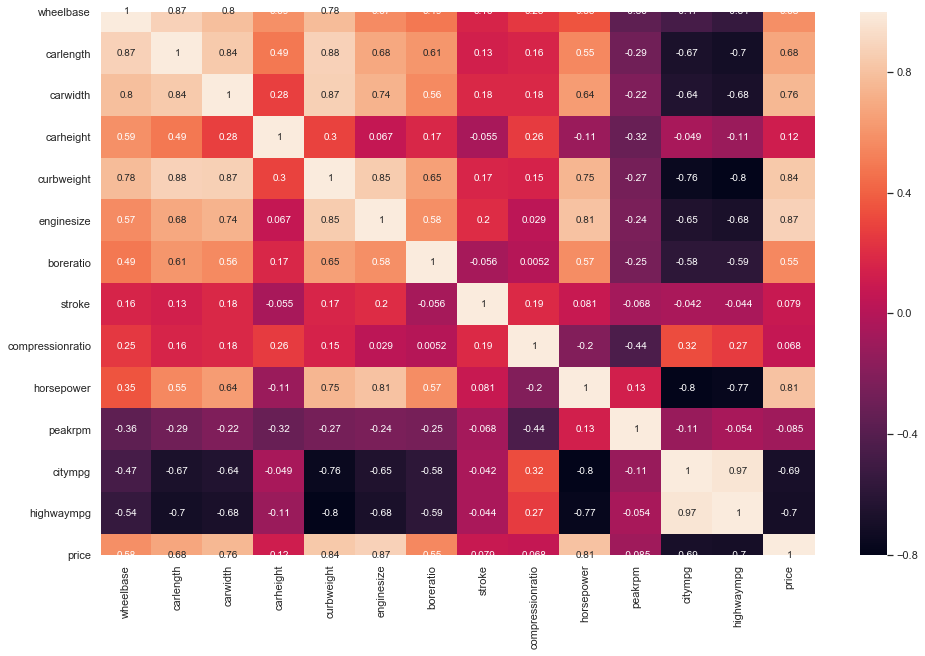

In [16]:
# Plot the heatmap to understand correlations
plt.figure(figsize = (16,10))
sns.heatmap(carprice_df.corr(),annot = True)

We observe following variables having high correlation with `price`:

Postive correlation:
- enginesize
- curbweight
- horsepower
- carwidth
- carlength
- wheelbase
- boreratio

Negative correlation:
- highwaympg
- citympg

Among above mentioned columns which are correlated highly with price in both ways positive and negative, we also observe high correlation between following columns as multicollinearity among features themselves:

Positive correlation:
- enginesize with curbweight, horsepower, carwidth and carlength
- curbweight with enginesize, carlength, carwidth, wheelbase
- wheelbase with carlength, carwidth and curbweight
- highwaympg with citympg is also highly correlated.

Negative correlation:
- highwaympg with curbweigth and horsepower
- citympg with curbweigth and horsepower
- negative correlation also between citympg, highwaympg, carlength, carwidth

In [17]:
# Average car price in the US market is ~13,000 USD
carprice_df['price'].mean()

13276.710570731706

In [18]:
# Create a new dataframe which contains numeric variables.
print("shape of original df:", carprice_df.shape)
carprice_quant_df = carprice_df.select_dtypes(include=np.number)
print("shape of quantitative df:", carprice_quant_df.shape)
carprice_quant_df.head()

shape of original df: (205, 25)
shape of quantitative df: (205, 14)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
# Create a new dataframe which contains categorical variables.
print("shape of original df:", carprice_df.shape)
carprice_cat_df = carprice_df.select_dtypes(exclude=np.number)
print("shape of categorical df:", carprice_cat_df.shape)
carprice_cat_df.head()

shape of original df: (205, 25)
shape of categorical df: (205, 11)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carcompany
0,risky,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,risky,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,moderate,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,risky,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,risky,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


Scatter plots for small groups of quantitative variables and their correlation with target variable "price". Split between three groups for readability purpose

['wheelbase', 'carlength', 'carwidth', 'carheight', 'price']


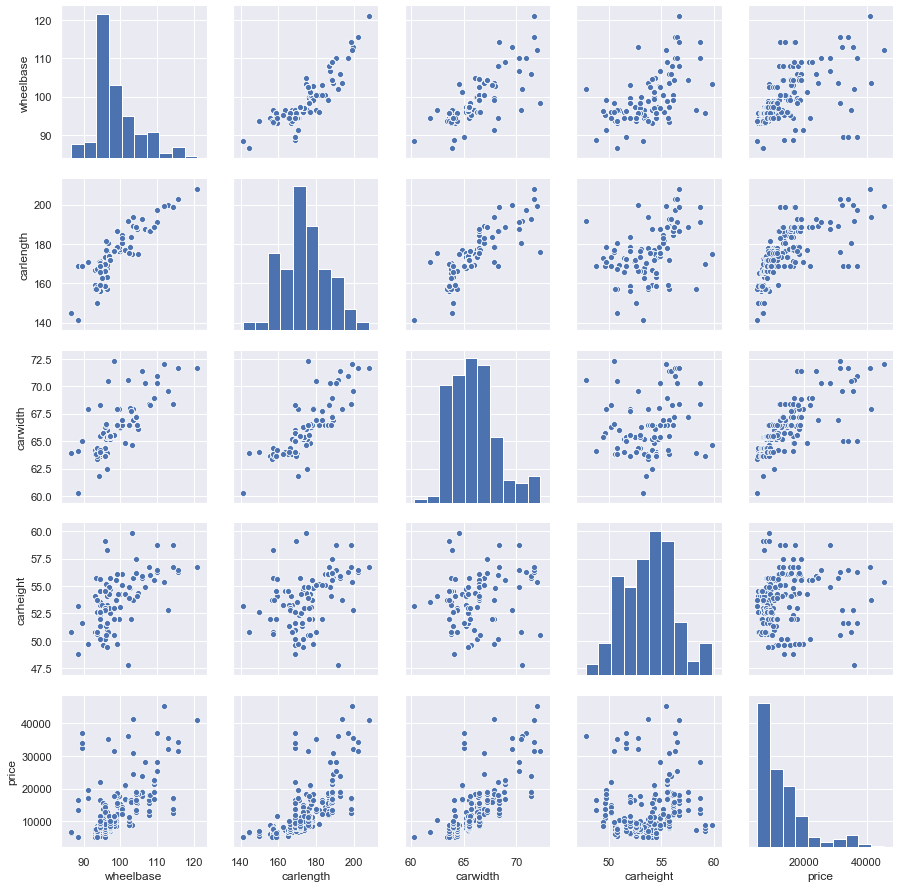

In [20]:
# Plot first five columns of quantitative dataframe and along with "price" in a grid scatter plot
# Observe good positive linear relation for carlength and carwidth with price
# Observe decent but not so clear linear relation in wheelbase and carheight in scatter plot with price
df_to_plot = carprice_quant_df.iloc[:,0:4].join(carprice_quant_df['price'])
print(list(df_to_plot.columns))
make_plot(df_to_plot, plot='scatter')

['curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'price']


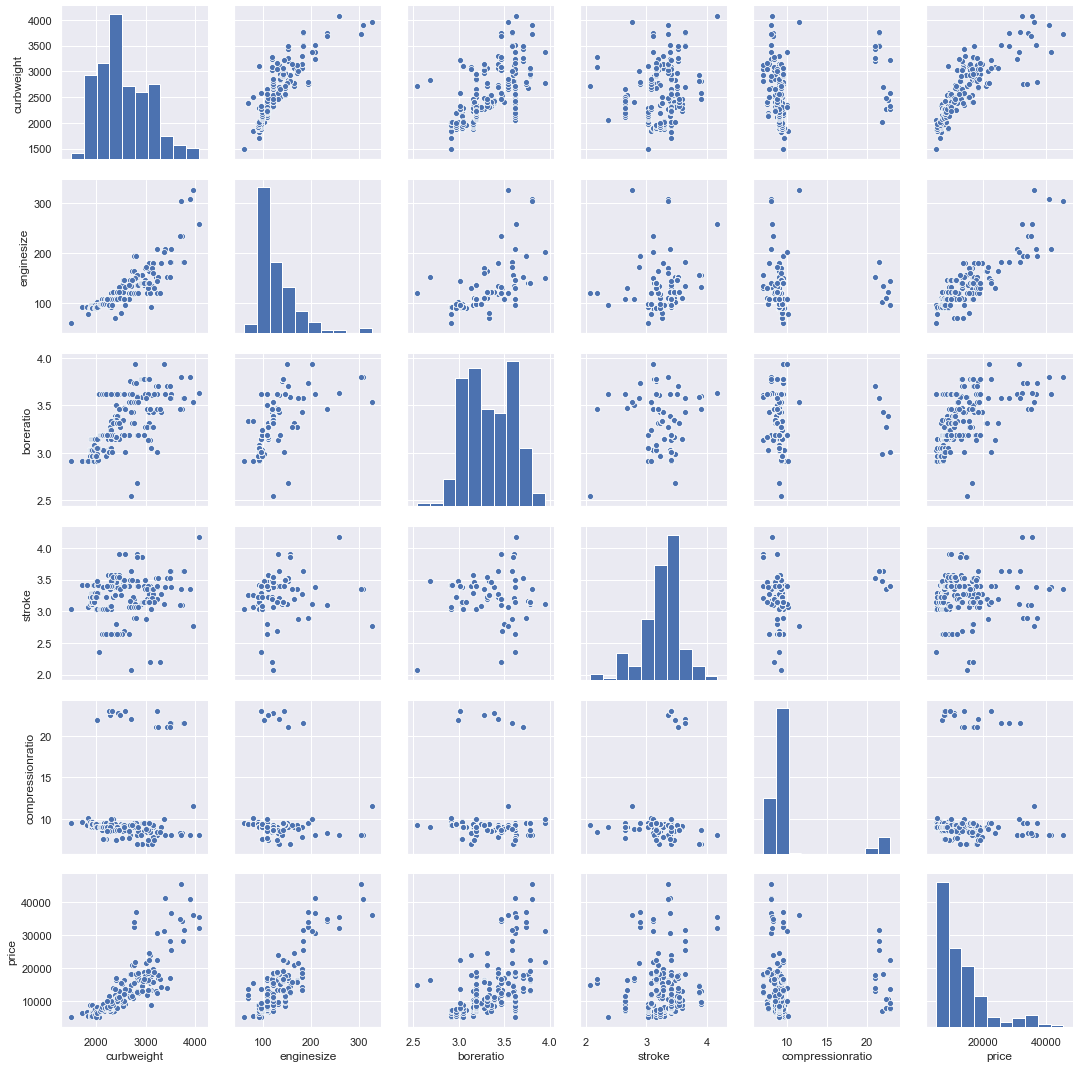

In [21]:
# Plot next four columns of quantitative dataframe and along with "price" in a grid scatter plot.
# Strong positive linear regression observed for curbweight with price
# Observe postitve linear relation for enginesize & boreratio with price
# Observe not so clear linear relation for stroke with price
# Observe effects of outlier presence in compressionratio in scatter plot with price
df_to_plot = carprice_quant_df.iloc[:,4:9].join(carprice_quant_df['price'])
print(list(df_to_plot.columns))
make_plot(df_to_plot, plot='scatter')

['horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


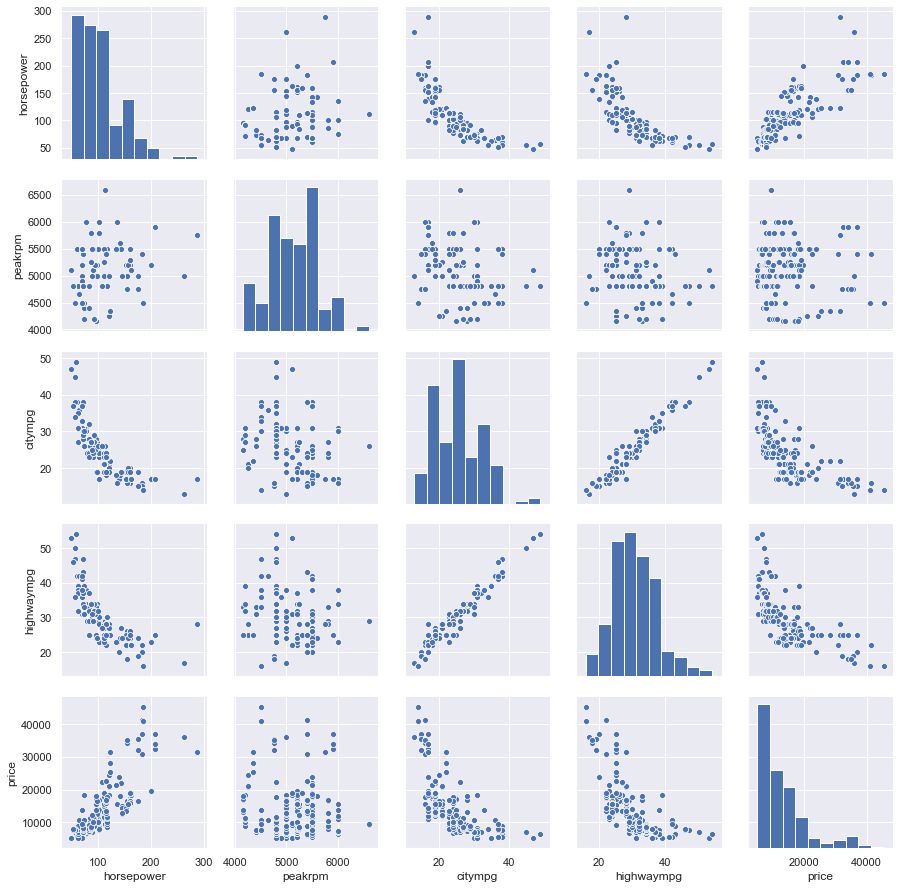

In [22]:
# Plot next four columns of quantitative dataframe including "price" in a grid scatter plot
# Observe highly positive linear relation for horsepower with price
# Observe not so clear linear relation for peakrpm with price
# Observe highly negative linear relation for citympg and highwaympg with price
df_to_plot = carprice_quant_df.iloc[:,9:15]
print(list(df_to_plot.columns))
make_plot(df_to_plot, plot='scatter')

['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


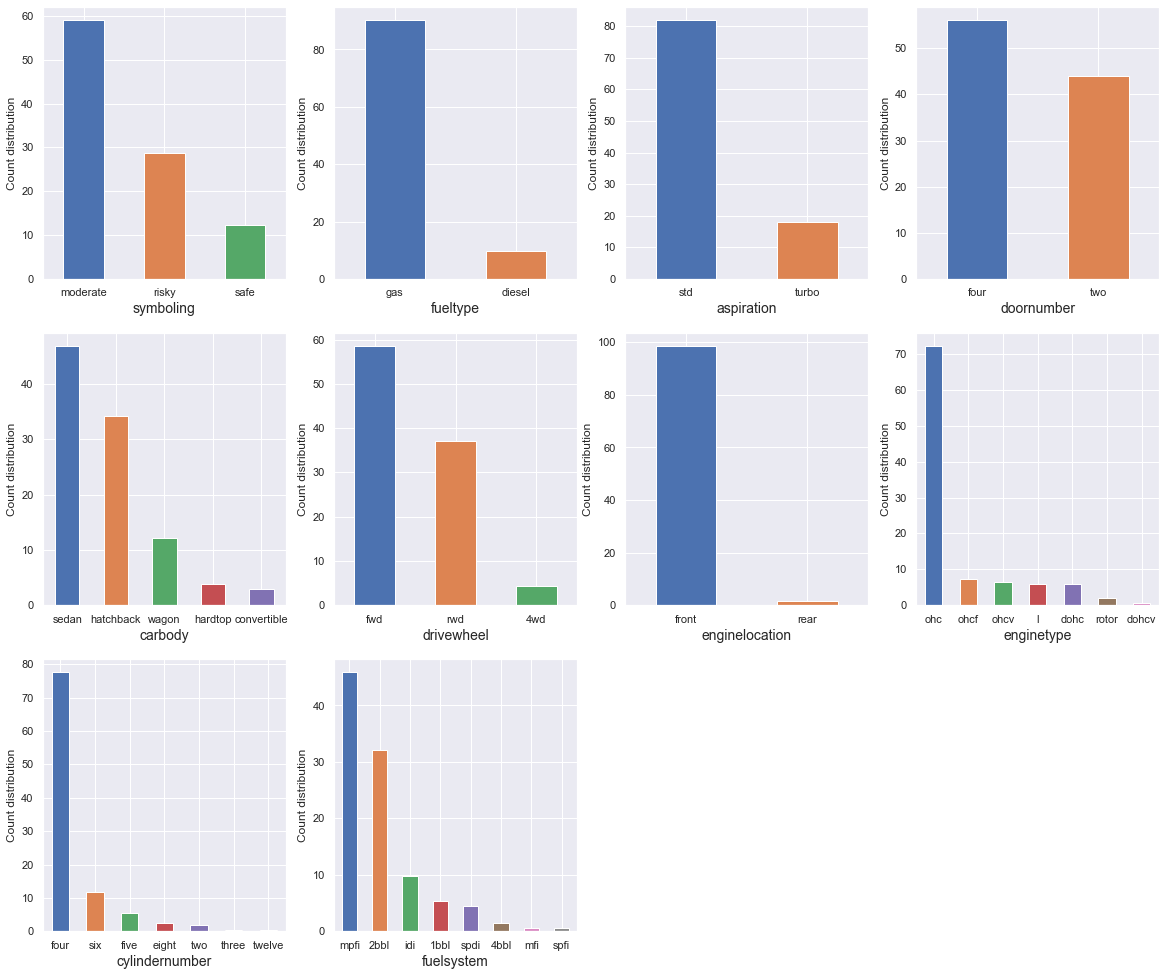

In [23]:
# Bar plot of count distribution for all categorical variables
# Excluding carcompany column as it has lots of unique values
print(list(carprice_cat_df.iloc[:,:-1].columns))
make_plot(carprice_cat_df.iloc[:,:-1], plt_rows=3, plt_cols=4, plot='bar')

Following observations are made based on the bar plot above for categorical features:
- `moderate` symboling is the most frequest
- fuel type is mostly `gas`
- aspiration is `standard` mostly
- number of doors as `four` is widely famous
- `sedan` car body is sold most
- drivewheel as `forward` is the most widely used
- preferred enginelocation is mostly `front`
- enginetype preferred is mostly `ohc`
- `four` cylinders in number is mostly preferred
- `mpfi` is the most widely used fuel system

carcompany
toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
Name: price, dtype: int64


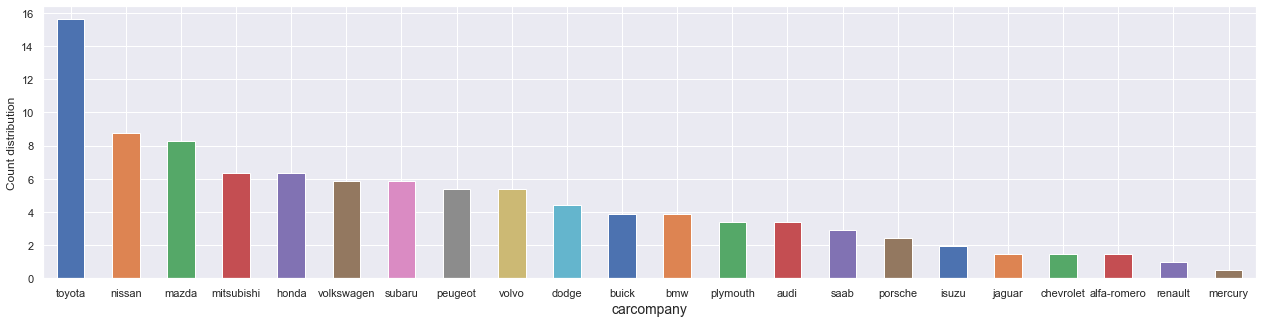

In [24]:
# Bar plot of count distribution for carcompany column, as it has lots of unique company names
# This shows that Toyota has sold the most number of cars in the US market, followed by nissan and mazda
df_to_plot = carprice_cat_df.join(carprice_quant_df['price'])
print(df_to_plot.groupby('carcompany').price.count().sort_values(ascending=False).head())
make_plot(df_to_plot[['carcompany']], plot='bar', fig_size=(100, 17))

['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'price']


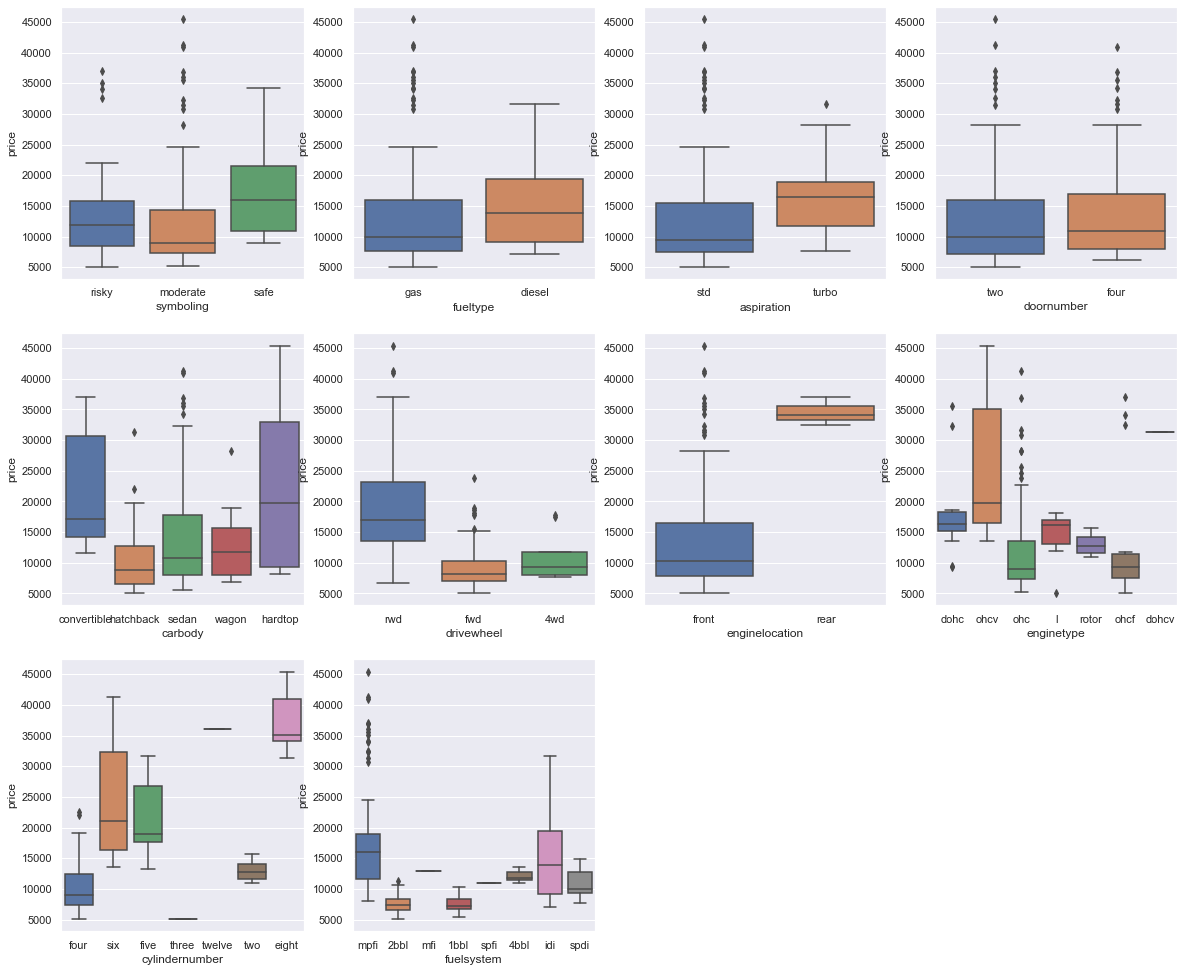

In [25]:
# Box plot of count distribution for all categorical variables except the carcompany
# This helps to understand relation with the target variable "price"
# df_to_plot is custom created by joining "price" column in categorical dataframe
# In carprice_cat_df, not selecting the carcompany, and fetching only price column from carprice_quant_df
df_to_plot = carprice_cat_df.iloc[:,:-1].join(carprice_quant_df['price'])
print(list(df_to_plot.columns))
make_plot(df_to_plot)

We observe the following based on the box plot of all above categorical column, with the price target variable:
- `safe` symboling is high on price
- fueltype `diesel` and `turbo` aspiration has an impact on the price and drive it expensive
- number of doors has only slight impact on the price, not much.
- `convertible and hardtop` cars are more expensive than hatchback/sedan/wagon
- `real wheel drive` definetely has an impact on the price and it's highly priced
- `rear engine location` clearly drives the price also, they are priced more than front enginelocation
- enginetype `ohcv` and `eight` most number of cylinders also impact the price towards higher side.

carcompany
jaguar     35550.0
buick      32892.0
porsche    32528.0
bmw        22835.0
volvo      18420.0
Name: price, dtype: float64


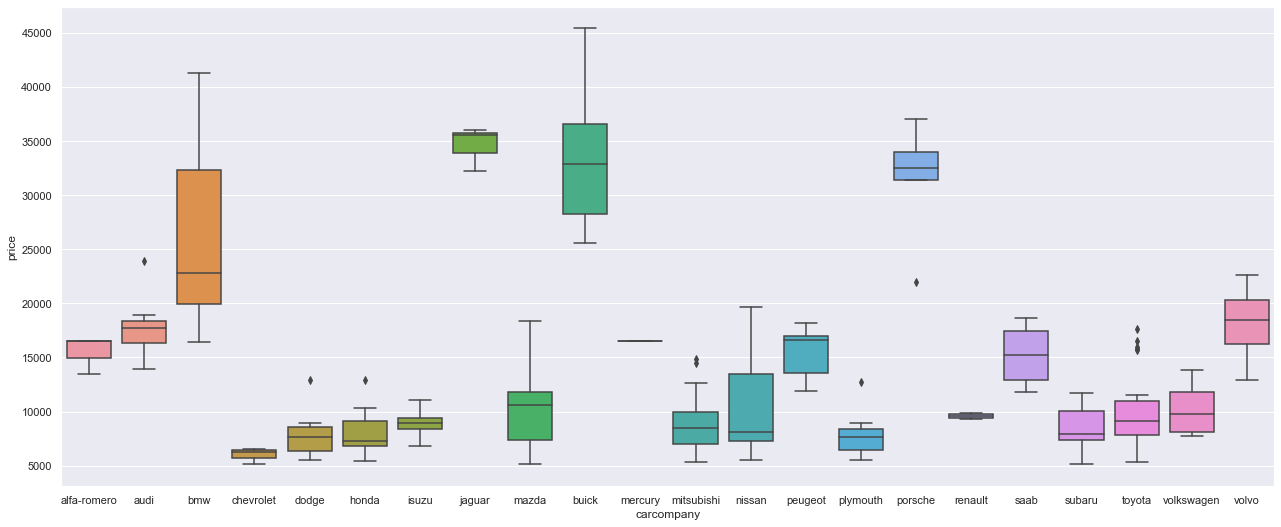

In [26]:
# Box plot car companies with the price, to understand which ones selling the most expensive ones in the US market
# We observe that the following car companies rolled out the most expensive cars in the US market on an average:
# - Jaguar
# - Buick
# - Porsche
# - BMW, and
# - volvo
df_to_plot = carprice_cat_df.iloc[:,-1:].join(carprice_quant_df['price'])
print(df_to_plot.groupby('carcompany').price.median().sort_values(ascending=False).head())
make_plot(df_to_plot, fig_size=(100, 30))

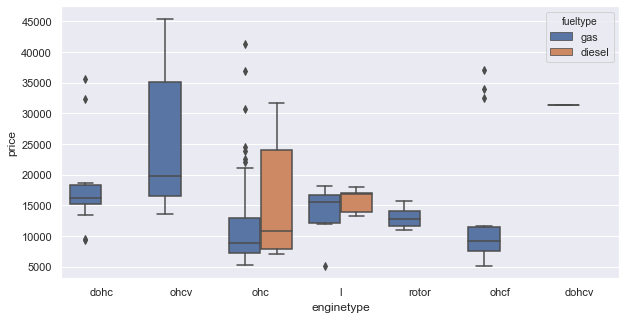

In [27]:
# Plot enginetype, fueltype and price to understand it's multivariate relationship
df_to_plot = carprice_cat_df[['enginetype', 'fueltype']].join(carprice_quant_df['price'])
make_plot(df_to_plot, x_bar='enginetype', hue = 'fueltype', fig_size=(10,5))

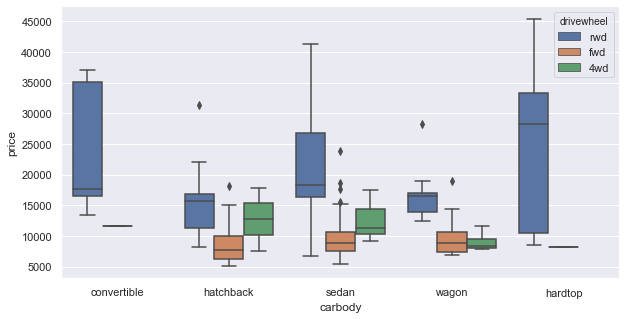

In [28]:
# Plot carbody, drivewheel and price to understand multi-variable relation
df_to_plot = carprice_cat_df[['carbody', 'drivewheel']].join(carprice_quant_df['price'])
make_plot(df_to_plot, x_bar='carbody', hue = 'drivewheel', fig_size=(10,5))

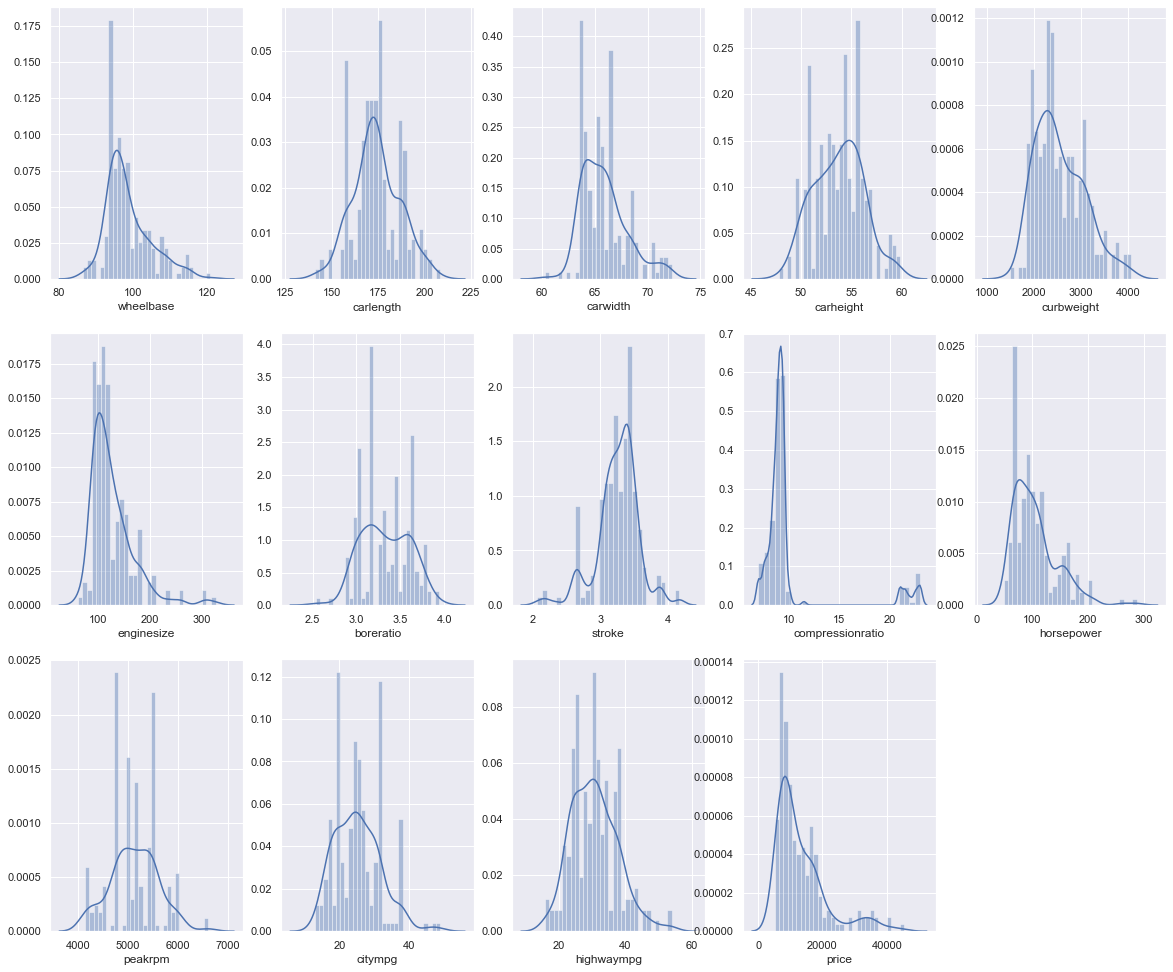

In [29]:
# Create distrubution plots for all quantitative variables
# We observe right skewed distribution for wheelbase, enginesize, compressionratio and horsepower due to outliers
# Even price target variable is right skewed, but it's possible as dataset also includes premium cars with high price
make_plot(carprice_quant_df, plot='dist', plt_cols=5)

In [30]:
# Statistical summary for all columns with outlier presence. For now, just describing them and proceed for first model
# An outlier would be defined as a value which more than 1.5 times of the iqr from third quartile, on both sides.
# upper_limit = q3 + (1.5 * iqr)
# lower_limit = q1 - (1.5 * iqr)
# We do observe even negative outliers on in compressionratio, but very few.
# As dataset is very small with just 205 records, for now we neither delete the outliers, nor impute them with median.
outlier_cols = ['wheelbase', 'enginesize', 'compressionratio', 'horsepower']
carprice_quant_df[outlier_cols].describe()

,wheelbase,enginesize,compressionratio,horsepower
count,205.000000,205.000000,205.000000,205.000000
mean,98.756585,126.907317,10.142537,104.117073
std,6.021776,41.642693,3.972040,39.544167
min,86.600000,61.000000,7.000000,48.000000
25%,94.500000,97.000000,8.600000,70.000000
50%,97.000000,120.000000,9.000000,95.000000
75%,102.400000,141.000000,9.400000,116.000000
max,120.900000,326.000000,23.000000,288.000000


## Step 4: Data Preparation (for Model 1)
In this step, we would be first doing the most basic data preparation and try building a linear regression model with all features as they exist, to understand performance of the base model only

In [31]:
# Backup carprice_quant_df for trying out different other models
carprice_quant_df_backup = deepcopy(carprice_quant_df)
carprice_quant_df_backup_new = deepcopy(carprice_quant_df)

In [32]:
# Derived features
# Earlier, from the scatter plot and the heatmap, we noticed there is a high correlation
# between carlength, wheelbase, carwidth, carweight, horsepower and citympg/highwaympg
# Lets create new variables from these to try reducing the multicolinearlity.
# This will be helpful to remove corelated variables.
# Once created, these original columns are dropped.

cols_to_scale_backup = list(carprice_quant_df.columns)
carprice_quant_df['len_width_ratio'] = carprice_quant_df.carlength/carprice_quant_df.carwidth
carprice_quant_df['width_height_ratio'] = carprice_quant_df.carwidth/carprice_quant_df.carheight
carprice_quant_df['power_curb_ratio'] = carprice_quant_df.horsepower/carprice_quant_df.curbweight
carprice_quant_df['highway_city_ratio'] = carprice_quant_df.highwaympg/carprice_quant_df.citympg
carprice_quant_df.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)
cols_to_scale = list(carprice_quant_df.columns)
carprice_quant_df.head()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,len_width_ratio,width_height_ratio,power_curb_ratio,highway_city_ratio
0,88.6,2548,130,3.47,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714
1,88.6,2548,130,3.47,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714
2,94.5,2823,152,2.68,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421
3,99.8,2337,109,3.19,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000
4,99.4,2824,136,3.19,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222


In [33]:
# Derived feature
# Since there seems a relationship between the car company and the pricing as per the box plot,
# and it's difficult to involve the car company name in current state for modelling
# due to large number of unique values. So it's would be better to create a derived variable out of car company name
# based on the mean car price of the brand company into multiple categories.
# - If mean price is below 10,000, then 'economy'
# - If mean price is between 10,000 and 20,000, then 'luxury'
# - If mean price is more than 20,000, then 'premium'

def segmentation(x):
    mean_value = x.mean()
    if mean_value < 10000:
        return 'economy'
    elif (mean_value >= 10000 and mean_value <= 20000):
        return 'luxury'
    elif mean_value > 20000:
        return 'premium'

source_df = carprice_cat_df.join(carprice_quant_df[['price']])
mapping_dict = dict(source_df.groupby('carcompany')['price'].apply(segmentation))
carprice_cat_df['carsegment'] = carprice_cat_df['carcompany'].apply(lambda x: mapping_dict[x])
carprice_cat_df.drop('carcompany',axis=1,inplace=True)
print(carprice_cat_df.carsegment.value_counts())
carprice_cat_df.head()

economy    95
luxury     86
premium    24
Name: carsegment, dtype: int64


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carsegment
0,risky,gas,std,two,convertible,rwd,front,dohc,four,mpfi,luxury
1,risky,gas,std,two,convertible,rwd,front,dohc,four,mpfi,luxury
2,moderate,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,luxury
3,risky,gas,std,four,sedan,fwd,front,ohc,four,mpfi,luxury
4,risky,gas,std,four,sedan,4wd,front,ohc,five,mpfi,luxury


In [34]:
# Handle binary categorical variables
# We identify the following categorical variables are binary in nature i.e they have only two unique values.
# Converting binary categorical variables to 0 and 1
# - fueltype (gas/diesel)
# - aspiration (std/turbo)
# - doornumber (two/four)
# - enginelocation (front/rear)
print(carprice_cat_df.head())
carprice_cat_df['fueltype'] = carprice_cat_df['fueltype'].map({'gas': 1, 'diesel': 0})
carprice_cat_df['aspiration'] = carprice_cat_df['aspiration'].map({'std': 1, 'turbo': 0})
carprice_cat_df['doornumber'] = carprice_cat_df['doornumber'].map({'two': 1, 'four': 0})
carprice_cat_df['enginelocation'] = carprice_cat_df['enginelocation'].map({'front': 1, 'rear': 0})
carprice_cat_df.head()

  symboling fueltype aspiration doornumber      carbody drivewheel  \
0     risky      gas        std        two  convertible        rwd   
1     risky      gas        std        two  convertible        rwd   
2  moderate      gas        std        two    hatchback        rwd   
3     risky      gas        std       four        sedan        fwd   
4     risky      gas        std       four        sedan        4wd   

  enginelocation enginetype cylindernumber fuelsystem carsegment  
0          front       dohc           four       mpfi     luxury  
1          front       dohc           four       mpfi     luxury  
2          front       ohcv            six       mpfi     luxury  
3          front        ohc           four       mpfi     luxury  
4          front        ohc           five       mpfi     luxury  


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carsegment
0,risky,1,1,1,convertible,rwd,1,dohc,four,mpfi,luxury
1,risky,1,1,1,convertible,rwd,1,dohc,four,mpfi,luxury
2,moderate,1,1,1,hatchback,rwd,1,ohcv,six,mpfi,luxury
3,risky,1,1,0,sedan,fwd,1,ohc,four,mpfi,luxury
4,risky,1,1,0,sedan,4wd,1,ohc,five,mpfi,luxury


In [35]:
# Create dummies
# Generate dummy variables for categorical variables with more than 2 levels using drop first
# We have included newly created features as well i.e symboling, carsegment.
dummy_cols = ['carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'symboling', 'carsegment']
print("before get_dummies:", carprice_cat_df.shape)
dummy_df = pd.get_dummies(carprice_cat_df[dummy_cols], drop_first=True)
carprice_cat_df.drop(dummy_cols, axis=1, inplace=True)
carprice_cat_df = carprice_cat_df.join(dummy_df)
print("after get_dummies:", carprice_cat_df.shape)
carprice_cat_df.head()

before get_dummies: (205, 11)
after get_dummies: (205, 33)


,fueltype,aspiration,doornumber,enginelocation,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_risky,symboling_safe,carsegment_luxury,carsegment_premium
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
2,1,1,1,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,1,1,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,1,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [36]:
# Backup carprice_cat_df for trying out different other models
carprice_cat_df_backup = deepcopy(carprice_cat_df)

In [37]:
# Merge quantitative and categorical features
# Join categorical and quantitative frames and build a master dataframe ready to perform modelling
master_df = carprice_quant_df.join(carprice_cat_df)
print(master_df.shape)
master_df.head()

(205, 46)


,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,len_width_ratio,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_risky,symboling_safe,carsegment_luxury,carsegment_premium
0,88.6,2548,130,3.47,2.68,9.0,111,5000,13495.0,2.633385,...,0,0,0,1,0,0,1,0,1,0
1,88.6,2548,130,3.47,2.68,9.0,111,5000,16500.0,2.633385,...,0,0,0,1,0,0,1,0,1,0
2,94.5,2823,152,2.68,3.47,9.0,154,5000,16500.0,2.613740,...,0,0,0,1,0,0,0,0,1,0
3,99.8,2337,109,3.19,3.40,10.0,102,5500,13950.0,2.667674,...,0,0,0,1,0,0,1,0,1,0
4,99.4,2824,136,3.19,3.40,8.0,115,5500,17450.0,2.659639,...,0,0,0,1,0,0,1,0,1,0


In [38]:
# Get columns which have just ONE distinct values in all the rows. This would help to cleanup the master dataframe.
# This uses the custom built utility function get_drop_column_having_one_unique_value()
get_drop_column_having_one_unique_value(master_df, drop=True)

Shape of dataframe (205, 46)
Your selected dataframe has 46 columns.
There are 0 columns that have only ONE distinct value in all the rows.
Shape of dataframe after dropping columns.(205, 46)


,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,len_width_ratio,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_risky,symboling_safe,carsegment_luxury,carsegment_premium
0,88.6,2548,130,3.47,2.68,9.0,111,5000,13495.0,2.633385,...,0,0,0,1,0,0,1,0,1,0
1,88.6,2548,130,3.47,2.68,9.0,111,5000,16500.0,2.633385,...,0,0,0,1,0,0,1,0,1,0
2,94.5,2823,152,2.68,3.47,9.0,154,5000,16500.0,2.613740,...,0,0,0,1,0,0,0,0,1,0
3,99.8,2337,109,3.19,3.40,10.0,102,5500,13950.0,2.667674,...,0,0,0,1,0,0,1,0,1,0
4,99.4,2824,136,3.19,3.40,8.0,115,5500,17450.0,2.659639,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,2952,141,3.78,3.15,9.5,114,5400,16845.0,2.740203,...,0,0,0,1,0,0,0,1,1,0
201,109.1,3049,141,3.78,3.15,8.7,160,5300,19045.0,2.744186,...,0,0,0,1,0,0,0,1,1,0
202,109.1,3012,173,3.58,2.87,8.8,134,5500,21485.0,2.740203,...,0,0,0,1,0,0,0,1,1,0
203,109.1,3217,145,3.01,3.40,23.0,106,4800,22470.0,2.740203,...,0,1,0,0,0,0,0,1,1,0


In [39]:
# List down all the feature columns in the master frame generated after all data cleaning/preparation/visualisation.
master_df.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'len_width_ratio',
       'width_height_ratio', 'power_curb_ratio', 'highway_city_ratio',
       'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'symboling_risky',
       'symboling_safe', 'carsegment_luxury', 'carsegment_premium'],
      dtype='object')

## Step 5: Preparing training dataset (for Model 1)

In [40]:
# Splitting the master dataframe into training and testing set.
# The first basic step for regression model building is performing a train-test split.
# Specify this so that the train and test data set always have the same rows using seed, respectively
np.random.seed(0)
df_train, df_test = train_test_split(master_df, train_size = 0.7, test_size = 0.3, random_state = 100)
print('df_train shape:', df_train.shape)
print('df_test shape:', df_test.shape)

df_train shape: (143, 46)
df_test shape: (62, 46)


In [41]:
# MinMax Scaling
# Observe that quantitative columns are in different range of values, so we should rescale
# Applying MinMax scaling to all the columns except the binary and dummy variables
scaler = MinMaxScaler()
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])
df_train[cols_to_scale].head()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,len_width_ratio,width_height_ratio,power_curb_ratio,highway_city_ratio
122,0.244828,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.068818,0.557140,0.448461,0.169146,0.348974
125,0.272414,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.466890,0.325594,0.709540,0.480607,0.650718
166,0.272414,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.122110,0.578350,0.350729,0.438242,0.178322
1,0.068966,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.314446,0.574393,0.592205,0.360040,0.441558
199,0.610345,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.382131,0.847483,0.230896,0.478148,0.454545


In [42]:
# Observe statistics describe of training dataframe, scaling has been successfuly performed.
df_train.describe()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,len_width_ratio,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_risky,symboling_safe,carsegment_luxury,carsegment_premium
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.219310,0.571441,...,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.244755,0.104895,0.412587,0.118881
std,0.205581,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.215682,0.194278,...,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.431453,0.307495,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.067298,0.474597,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.140343,0.578350,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.313479,0.701553,...,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [43]:
# Ready to divide the training dataframe into X and y datasets for the model building
# Got ready X_train and y_train for model building
y_train = df_train.pop('price')
X_train = df_train

## Step 6: Building a linear model (Using RFE) : Model 1
#### Trying to create a model with minimum derived variables and without treating the outliers in few quantitative variables

In [44]:
# Creating a LinearRegression model object importing from sklearn.linear_model package & fit it with X_train & y_train
# Next initiate RFE which is the feature ranking technique with recursive feature elimination.
# Running RFE with the desired number of features to select equal to 20
# Once RFE object is ready, fetch the ranks of top features with support and rank information
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

rfe = RFE(lm_model, 20)
rfe = rfe.fit(X_train, y_train)

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['col_name', 'support', 'rank'])
rfe_df[rfe_df['support']].sort_values(by='rank', ascending=False)

,col_name,support,rank
0,wheelbase,True,1
1,curbweight,True,1
33,cylindernumber_two,True,1
32,cylindernumber_twelve,True,1
31,cylindernumber_three,True,1
27,enginetype_rotor,True,1
24,enginetype_ohc,True,1
22,enginetype_dohcv,True,1
19,carbody_wagon,True,1
18,carbody_sedan,True,1


In [45]:
# Analyse the poitive & negative RFE reported support features
print('columns with positive RFE support:')
print(X_train.columns[rfe.support_], '\n')
rfe_cols = X_train.columns[rfe.support_]
print('columns with negative RFE support:')
print(X_train.columns[~rfe.support_])

# Alter X_train frame with only RFE selected variables
X_train_rfe = X_train[rfe_cols]

columns with positive RFE support:
Index(['wheelbase', 'curbweight', 'stroke', 'compressionratio', 'horsepower',
       'len_width_ratio', 'width_height_ratio', 'power_curb_ratio',
       'enginelocation', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_rotor', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'carsegment_premium'],
      dtype='object') 

columns with negative RFE support:
Index(['enginesize', 'boreratio', 'peakrpm', 'highway_city_ratio', 'fueltype',
       'aspiration', 'doornumber', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_l', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'symboling_risky', 'symboling_safe',
       'carse

In [46]:
# Fit a linear regression model using RFE referred features in X_train and then print the statsmodel summary
# We observe that curbweight has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop curbweight and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('curbweight', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     125.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.72e-71
Time:                        23:04:16   Log-Likelihood:                 232.57
No. Observations:                 143   AIC:                            -425.1
Df Residuals:                     123   BIC:                            -365.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.55

In [47]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that width_height_ratio has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop width_height_ratio and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('width_height_ratio', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     129.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.40e-71
Time:                        23:04:16   Log-Likelihood:                 230.49
No. Observations:                 143   AIC:                            -423.0
Df Residuals:                     124   BIC:                            -366.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.44

In [48]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that all features now having p-value less than 0.05, so it's making all variables significant.
# Next, let's check the VIF scores and ranks to proceed further and find collinearity among these variables
fit_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     134.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.86e-72
Time:                        23:04:16   Log-Likelihood:                 228.66
No. Observations:                 143   AIC:                            -421.3
Df Residuals:                     125   BIC:                            -368.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.46

              Features    VIF
16  cylindernumber_two    inf
13    enginetype_rotor    inf
5     power_curb_ratio  84.72
3           horsepower  70.82
6       enginelocation  57.97
4      len_width_ratio  38.10
0            wheelbase  24.82
1               stroke  24.14
9        carbody_sedan  23.16
8    carbody_hatchback  15.90


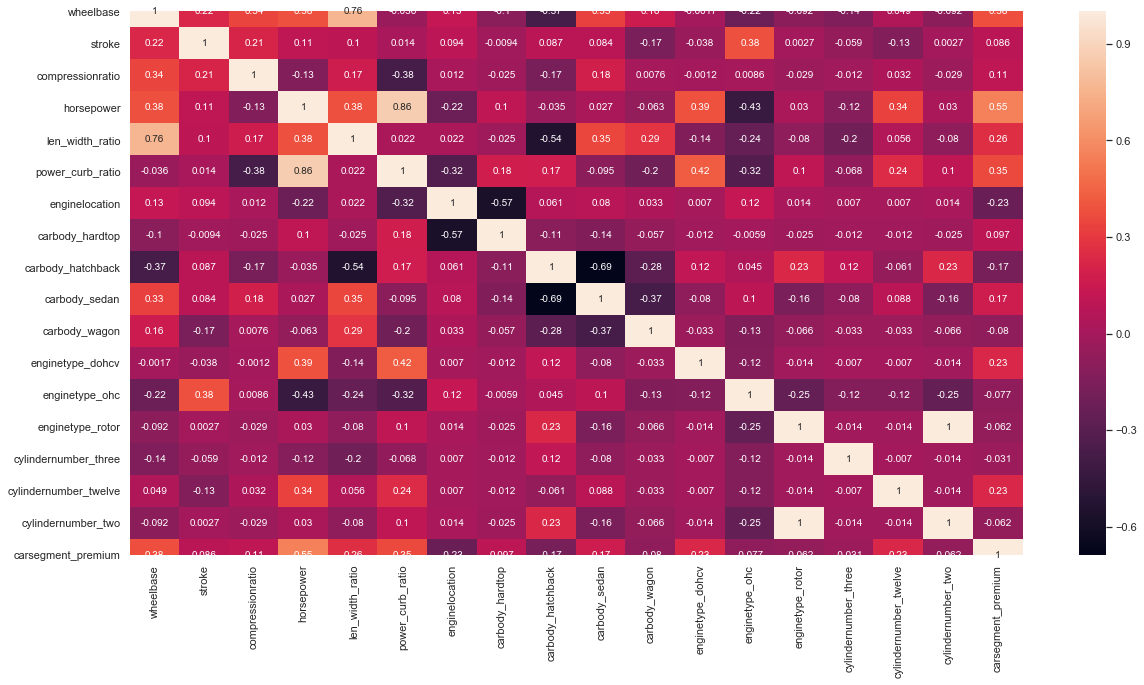

In [49]:
# let's check the VIF scores and ranks and find out any visible collinearity among these variables
# By checking VIF score, we find that cylindernumber_two and enginetype_rotor have "inf" VIF value.
# inf value as VIF denotes that these two variables are having strong correlation with the target variable i.e 1
# We also observe in the below heatmap that cylindernumber_two and enginetype_rotor have a correlation of 1
# Let's drop both cylindernumber_two and enginetype_rotor, then retry fitting a new model
# Even tried dropping these two one by one and then seeing the impact on model, but there was no impact, so dropping
get_vif(X_train_rfe)
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe.corr(),annot = True)
X_train_rfe = X_train_rfe.drop(['cylindernumber_two', 'enginetype_rotor'], axis=1)

In [50]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that cylindernumber_three has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop cylindernumber_three and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('cylindernumber_three', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     124.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.60e-69
Time:                        23:04:18   Log-Likelihood:                 218.78
No. Observations:                 143   AIC:                            -403.6
Df Residuals:                     126   BIC:                            -353.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.42

In [51]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that all features now having p-value less than 0.05, so it's making all variables significant.
# Next, let's check the VIF scores and ranks to proceed further and find collinearity among these variables
fit_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     130.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.96e-69
Time:                        23:04:18   Log-Likelihood:                 216.95
No. Observations:                 143   AIC:                            -401.9
Df Residuals:                     127   BIC:                            -354.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.42

In [52]:
# Using get_vif to get VIF ranking for all variables in descending order using variance_inflation_factor method
# Prints the vif_df containing VIF ranks for each variable/feature
# We observe that power_curb_ratio has very high VIF value i.e 83.21%, this leads to multicollinearity.
# This means that power_curb_ratio is explained ~83% well by another feature already in the list
# So, dropping power_curb_ratio feature
get_vif(X_train_rfe)
X_train_rfe = X_train_rfe.drop('power_curb_ratio', axis=1)

             Features    VIF
5    power_curb_ratio  83.21
3          horsepower  68.63
6      enginelocation  57.27
4     len_width_ratio  37.62
0           wheelbase  24.72
1              stroke  23.18
9       carbody_sedan  22.99
8   carbody_hatchback  15.67
10      carbody_wagon   6.69
12     enginetype_ohc   6.56


In [53]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that len_width_ratio has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop len_width_ratio and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('len_width_ratio', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     118.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.15e-66
Time:                        23:04:18   Log-Likelihood:                 205.53
No. Observations:                 143   AIC:                            -381.1
Df Residuals:                     128   BIC:                            -336.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [54]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that stroke has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop stroke and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('stroke', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     127.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.87e-67
Time:                        23:04:18   Log-Likelihood:                 204.98
No. Observations:                 143   AIC:                            -382.0
Df Residuals:                     129   BIC:                            -340.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [55]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that enginetype_ohc has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop enginetype_ohc and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('enginetype_ohc', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     137.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.77e-68
Time:                        23:04:18   Log-Likelihood:                 204.20
No. Observations:                 143   AIC:                            -382.4
Df Residuals:                     130   BIC:                            -343.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [56]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that cylindernumber_twelve has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop cylindernumber_twelve and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('cylindernumber_twelve', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.06e-68
Time:                        23:04:18   Log-Likelihood:                 203.13
No. Observations:                 143   AIC:                            -382.3
Df Residuals:                     131   BIC:                            -346.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [57]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that all features now having p-value less than 0.05, so it's making all variables significant.
# Next, let's check the VIF scores and ranks to proceed further and find collinearity among these variables
fit_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     162.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.65e-69
Time:                        23:04:18   Log-Likelihood:                 201.94
No. Observations:                 143   AIC:                            -381.9
Df Residuals:                     132   BIC:                            -349.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2404      0

In [58]:
# Using get_vif to get VIF ranking for all variables in descending order using variance_inflation_factor method
# Prints the vif_df containing VIF ranks for each variable/feature
# We observe that enginelocation has very high VIF value i.e 32.61%, this leads to multicollinearity.
# This means that enginelocation is explained ~33% well by another feature already in the list
# So, dropping power_curb_ratio feature
get_vif(X_train_rfe)
X_train_rfe = X_train_rfe.drop('enginelocation', axis=1)

             Features    VIF
3      enginelocation  32.61
6       carbody_sedan  16.87
5   carbody_hatchback  11.71
0           wheelbase  10.40
2          horsepower   5.92
7       carbody_wagon   5.55
1    compressionratio   2.15
9  carsegment_premium   1.84
4     carbody_hardtop   1.34
8    enginetype_dohcv   1.28


In [59]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that all features now having p-value less than 0.05, so it's making all variables significant.
# Next, let's check the VIF scores and ranks to proceed further and find collinearity among these variables
fit_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.89e-69
Time:                        23:04:18   Log-Likelihood:                 199.61
No. Observations:                 143   AIC:                            -379.2
Df Residuals:                     133   BIC:                            -349.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0651      0

In [60]:
# Using get_vif to get VIF ranking for all variables in descending order using variance_inflation_factor method
# Prints the vif_df containing VIF ranks for each variable/feature
# We observe that wheelbase has very slightly high VIF value i.e 10.32%, this leads to slight multicollinearity.
# Following on rule that any VIF scroe above 10 should be handled and dealt with by dropping it and observe impact
# So, dropping wheelbase feature
get_vif(X_train_rfe)
X_train_rfe = X_train_rfe.drop('wheelbase', axis=1)

             Features    VIF
0           wheelbase  10.32
2          horsepower   5.75
5       carbody_sedan   4.58
4   carbody_hatchback   2.42
1    compressionratio   2.14
6       carbody_wagon   2.12
8  carsegment_premium   1.82
7    enginetype_dohcv   1.27
3     carbody_hardtop   1.12


In [61]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that all features now having p-value less than 0.05, so it's making all variables significant.
# Next, let's check the VIF scores and ranks to proceed further and find collinearity among these variables
fit_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     137.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.98e-61
Time:                        23:04:18   Log-Likelihood:                 175.78
No. Observations:                 143   AIC:                            -333.6
Df Residuals:                     134   BIC:                            -306.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0592      0

             Features   VIF
1          horsepower  4.55
4       carbody_sedan  2.83
3   carbody_hatchback  2.03
0    compressionratio  1.80
7  carsegment_premium  1.78
5       carbody_wagon  1.43
6    enginetype_dohcv  1.21
2     carbody_hardtop  1.12


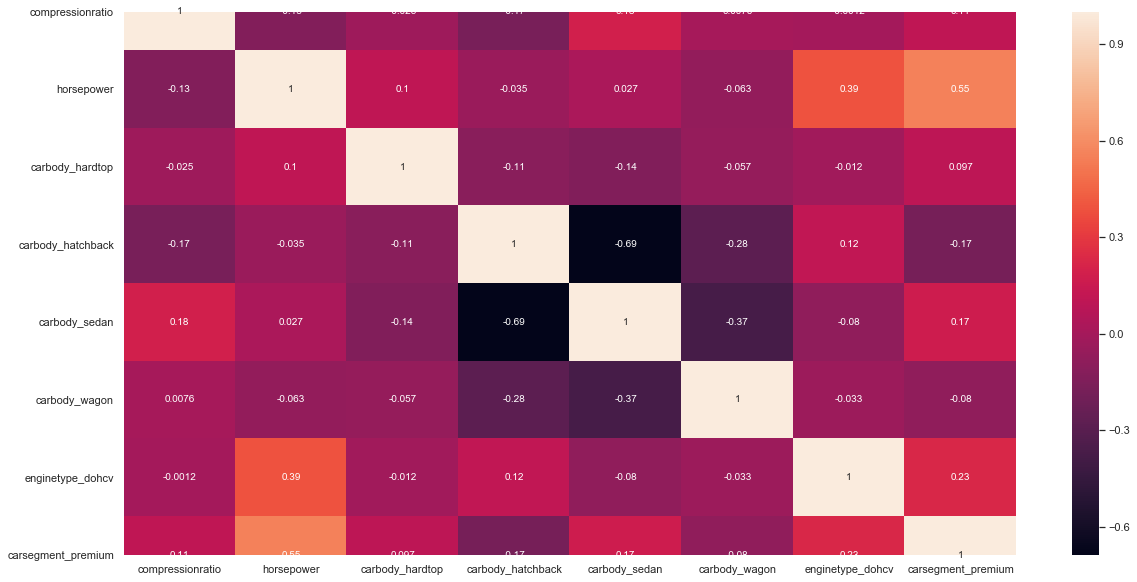

In [62]:
# Using get_vif to get VIF ranking for all variables in descending order using variance_inflation_factor method
# Prints the vif_df containing VIF ranks for each variable/feature
# We observe that all the variables have acceptable low VIF value of below 5, which is good metric for the model
# Adjusted R squared value obtained above is 0.885, compared to R-squared of 0.892, which is good for model
# Let's try to get rid of some more features based on their p-value, and then analyse it's impact on the adjusted Rsq
# Dropping "carbody_sedan" based on VIF score
get_vif(X_train_rfe)
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe.corr(),annot = True)
X_train_rfe = X_train_rfe.drop('carbody_sedan', axis=1)

In [63]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that carbody_wagon has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop carbody_wagon and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('carbody_wagon', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     153.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.48e-61
Time:                        23:04:18   Log-Likelihood:                 173.57
No. Observations:                 143   AIC:                            -331.1
Df Residuals:                     135   BIC:                            -307.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0138      0

In [64]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that carbody_hardtop has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop carbody_hardtop and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('carbody_hardtop', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     179.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.53e-62
Time:                        23:04:18   Log-Likelihood:                 173.41
No. Observations:                 143   AIC:                            -332.8
Df Residuals:                     136   BIC:                            -312.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0164      0

### Model 1 is ready

In [65]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that all features now having p-value less than 0.05, so it's making all variables significant.
# Next, let's check the VIF scores and ranks to proceed further and find collinearity among these variables
final_model_1 = fit_model(X_train_rfe, return_flag=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     215.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.65e-63
Time:                        23:04:18   Log-Likelihood:                 172.93
No. Observations:                 143   AIC:                            -333.9
Df Residuals:                     137   BIC:                            -316.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0170      0

In [66]:
# Using get_vif to get VIF ranking for all variables in descending order using variance_inflation_factor method
# Prints the vif_df containing VIF ranks for each variable/feature
# We observe that all the features now have below 5% of VIF value which is pretty good.
get_vif(X_train_rfe)

             Features   VIF
1          horsepower  2.31
4  carsegment_premium  1.67
2   carbody_hatchback  1.38
0    compressionratio  1.28
3    enginetype_dohcv  1.12


## Step 7: Model Evaluation

Text(0.5, 0, 'Errors')

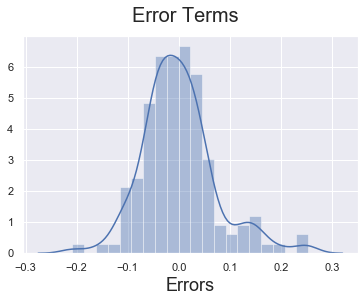

In [67]:
# Residual Analysis of the train data
# One of major assumptions of linear regression is that error terms should be normally distributed,
# verifying by observing the histogram plot of the error terms.
# First, perform predict on the final model and get the predicted y_train values
# Next, plot the histogram of the error terms
y_train_values = final_model_1.predict()

fig = plt.figure()
sns.distplot((y_train - y_train_values), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Although not the absolutely perfect normal distribution and centered not perfectly but almost around zero. There is some error variance along the tails meaning model is still not able to explain some variance. Considering the size of the train and test data this error term distribution still is almost close to a normal distribution.

In [68]:
# MinMax Scaling
# We use the cols_to_scale list of columns to perform min-max scaling
# Applying MinMax scaling to all the columns except the binary and dummy variables
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

In [69]:
# Make predictions on the test dataset
# Before making any inference about the equation of the linear regression, let's test it on the test dataset
# First step is to divide the whole test dataset into X_test and y_test
# Next we subset df_test with only final model features and perform mandatory step of adding constant
# Finally, using the final model object call the predict method and get the predicted y_pred values
y_test = df_test.pop('price')
X_test = df_test[X_train_rfe.columns]
X_test = sm.add_constant(X_test)
y_pred = final_model_1.predict(X_test)

Text(0, 0.5, 'y_pred')

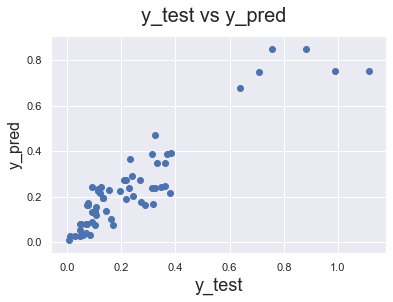

In [70]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [71]:
# Model Evaluation
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.09027151854764469
Model r2_score: 0.8475357123012759


All the independent variable have considerably lowest VIF and the **Adj. R-Squared is 0.888** which is quite a significant fit. So we have a decent model in place, next we will try to create few more model fit variations

## Step 8: Building & Evaluating Model 2 (Using RFE)
#### In this model we will be doing some imputations and treat the outliers to see if it has any impacts on the overall model performance

#### Data Preparation

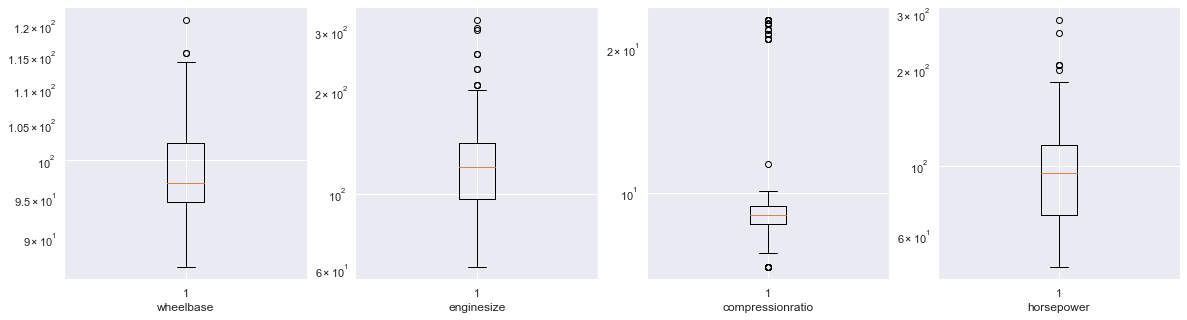

In [72]:
# Create distrubution plots for each quantitative variable, except car_id and price
# We observe right skewed distribution for wheelbase, enginesize, compressionratio and horsepower due to outliers
df_to_plot = carprice_quant_df_backup[outlier_cols]
make_plot(df_to_plot, plot='bar', y_bar=None)

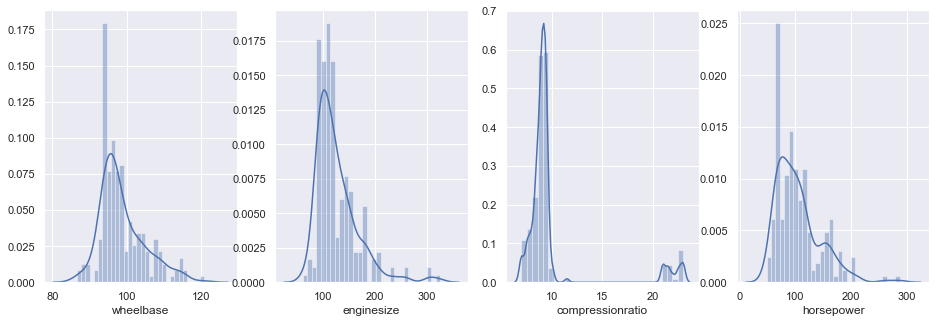

In [73]:
# Create distrubution plots for each quantitative variable, except car_id and price
# We observe right skewed distribution for wheelbase, enginesize, compressionratio and horsepower due to outliers
df_to_plot = carprice_quant_df_backup[outlier_cols]
make_plot(df_to_plot, plot='dist', plt_cols=5)

In [74]:
# As the dataset is not so large, so I would not like to remove any rows, instead impute the outliers with median
# We observe some negative outliers also in compressionratio
# An outlier would be defined as a value which more than 1.5 times of the iqr on both sides
def outlier_treatment(series):
    # Find quartile values
    q1 = series.quantile(0.25)
    median = series.quantile(0.50)
    q3 = series.quantile(0.75)
    # check iqr and lower/upper limits
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    # Perform imputation
    series[series > upper_limit] = median
    series[series < lower_limit] = median
    return series

In [75]:
# Perform outlier treatment and describe the statistics for all outlier columns
print(outlier_cols)
carprice_quant_df_backup[outlier_cols] = carprice_quant_df_backup[outlier_cols].apply(outlier_treatment)
carprice_quant_df_backup[outlier_cols].describe()

['wheelbase', 'enginesize', 'compressionratio', 'horsepower']


,wheelbase,enginesize,compressionratio,horsepower
count,205.000000,205.000000,205.000000,205.000000
mean,98.458537,120.326829,8.929854,100.209756
std,5.570721,28.356891,0.524056,32.591047
min,86.600000,61.000000,7.500000,48.000000
25%,94.500000,97.000000,8.700000,70.000000
50%,97.000000,120.000000,9.000000,95.000000
75%,101.200000,136.000000,9.300000,116.000000
max,114.200000,203.000000,10.100000,184.000000


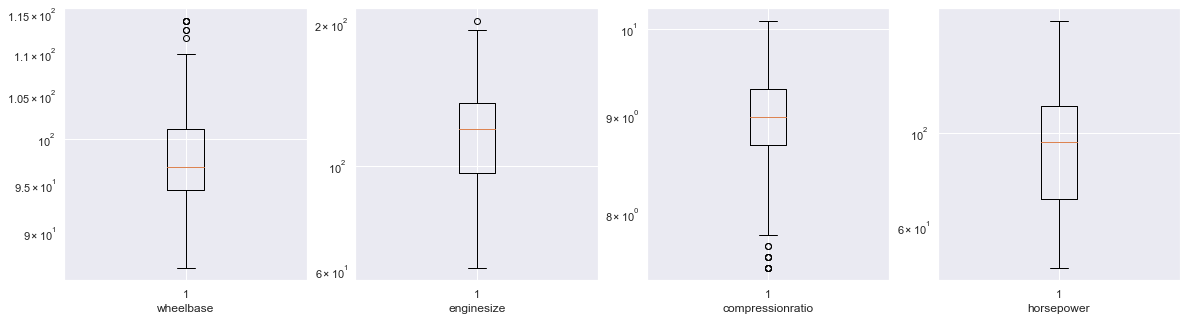

In [76]:
# Create box plot for the outlier columns, although outliers do exist still but now they are lesser than earlier
df_to_plot = carprice_quant_df_backup[outlier_cols]
make_plot(df_to_plot, plot='bar', y_bar=None)

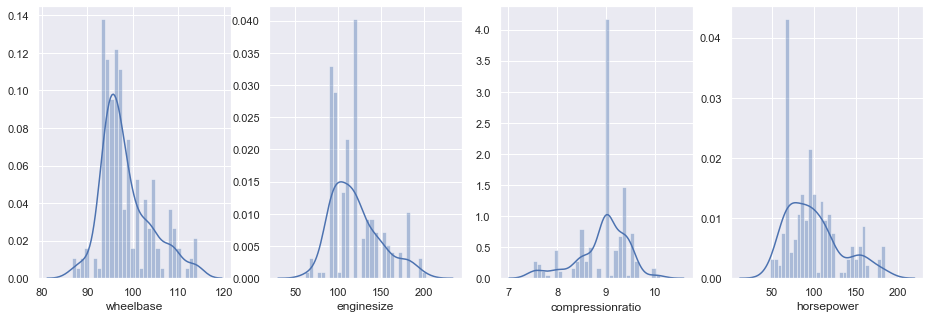

In [77]:
# Create distrubution plots for each quantitative variable after outlier treatment, linear curve is better
df_to_plot = carprice_quant_df_backup[outlier_cols]
make_plot(df_to_plot, plot='dist', plt_cols=5)

In [78]:
# Derived features
# Earlier, from the scatter plot and the heatmap, we noticed there is a high correlation
# between carlength, wheelbase, carwidth, carweight, horsepower and citympg/highwaympg
# Lets create new variables from these to try reducing the multicolinearlity.
# This will be helpful to remove corelated variables.
# Once created, these original columns are dropped.

carprice_quant_df_backup['len_width_ratio'] = carprice_quant_df_backup.carlength/carprice_quant_df_backup.carwidth
carprice_quant_df_backup['width_height_ratio'] = carprice_quant_df_backup.carwidth/carprice_quant_df_backup.carheight
carprice_quant_df_backup['power_curb_ratio'] = carprice_quant_df_backup.horsepower/carprice_quant_df_backup.curbweight
carprice_quant_df_backup['highway_city_ratio'] = carprice_quant_df_backup.highwaympg/carprice_quant_df_backup.citympg
carprice_quant_df_backup.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)
carprice_quant_df_backup.head()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,len_width_ratio,width_height_ratio,power_curb_ratio,highway_city_ratio
0,88.6,2548,130,3.47,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714
1,88.6,2548,130,3.47,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714
2,94.5,2823,152,2.68,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421
3,99.8,2337,109,3.19,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000
4,99.4,2824,136,3.19,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222


In [79]:
# Merge quantitative and categorical features from backup dataframes
# Join categorical and quantitative frames and build a master dataframe ready to perform modelling
master_df = carprice_quant_df_backup.join(carprice_cat_df_backup)
print(master_df.shape)
master_df.head()

(205, 46)


,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,len_width_ratio,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_risky,symboling_safe,carsegment_luxury,carsegment_premium
0,88.6,2548,130,3.47,2.68,9.0,111,5000,13495.0,2.633385,...,0,0,0,1,0,0,1,0,1,0
1,88.6,2548,130,3.47,2.68,9.0,111,5000,16500.0,2.633385,...,0,0,0,1,0,0,1,0,1,0
2,94.5,2823,152,2.68,3.47,9.0,154,5000,16500.0,2.613740,...,0,0,0,1,0,0,0,0,1,0
3,99.8,2337,109,3.19,3.40,10.0,102,5500,13950.0,2.667674,...,0,0,0,1,0,0,1,0,1,0
4,99.4,2824,136,3.19,3.40,8.0,115,5500,17450.0,2.659639,...,0,0,0,1,0,0,1,0,1,0


In [80]:
# Get columns which have just ONE distinct values in all the rows. This would help to cleanup the master dataframe.
# This uses the custom built utility function get_drop_column_having_one_unique_value()
get_drop_column_having_one_unique_value(master_df, drop=True)

Shape of dataframe (205, 46)
Your selected dataframe has 46 columns.
There are 0 columns that have only ONE distinct value in all the rows.
Shape of dataframe after dropping columns.(205, 46)


,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,len_width_ratio,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_risky,symboling_safe,carsegment_luxury,carsegment_premium
0,88.6,2548,130,3.47,2.68,9.0,111,5000,13495.0,2.633385,...,0,0,0,1,0,0,1,0,1,0
1,88.6,2548,130,3.47,2.68,9.0,111,5000,16500.0,2.633385,...,0,0,0,1,0,0,1,0,1,0
2,94.5,2823,152,2.68,3.47,9.0,154,5000,16500.0,2.613740,...,0,0,0,1,0,0,0,0,1,0
3,99.8,2337,109,3.19,3.40,10.0,102,5500,13950.0,2.667674,...,0,0,0,1,0,0,1,0,1,0
4,99.4,2824,136,3.19,3.40,8.0,115,5500,17450.0,2.659639,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,2952,141,3.78,3.15,9.5,114,5400,16845.0,2.740203,...,0,0,0,1,0,0,0,1,1,0
201,109.1,3049,141,3.78,3.15,8.7,160,5300,19045.0,2.744186,...,0,0,0,1,0,0,0,1,1,0
202,109.1,3012,173,3.58,2.87,8.8,134,5500,21485.0,2.740203,...,0,0,0,1,0,0,0,1,1,0
203,109.1,3217,145,3.01,3.40,9.0,106,4800,22470.0,2.740203,...,0,1,0,0,0,0,0,1,1,0


In [81]:
# List down all the feature columns in the master frame generated after all data cleaning/preparation/visualisation.
master_df.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'len_width_ratio',
       'width_height_ratio', 'power_curb_ratio', 'highway_city_ratio',
       'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'symboling_risky',
       'symboling_safe', 'carsegment_luxury', 'carsegment_premium'],
      dtype='object')

#### Train-Test Split

In [82]:
# Splitting the master dataframe into training and testing set.
# The first basic step for regression model building is performing a train-test split.
# Specify this so that the train and test data set always have the same rows using seed, respectively
np.random.seed(0)
df_train, df_test = train_test_split(master_df, train_size = 0.7, test_size = 0.3, random_state = 100)
print('df_train shape:', df_train.shape)
print('df_test shape:', df_test.shape)

df_train shape: (143, 46)
df_test shape: (62, 46)


In [83]:
# MinMax Scaling
# We use the cols_to_scale list of columns stored while doing data preparation for model 1
# Observe that quantitative columns are in different range of values, so we should rescale
# Applying MinMax scaling to all the columns except the binary and dummy variables
scaler = MinMaxScaler()
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])
df_train[cols_to_scale].head()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,len_width_ratio,width_height_ratio,power_curb_ratio,highway_city_ratio
122,0.257246,0.272692,0.260563,0.230159,0.525253,0.76,0.149254,0.551020,0.068818,0.557140,0.448461,0.306100,0.348974
125,0.286232,0.500388,0.633803,1.000000,0.464646,0.80,0.708955,0.551020,0.466890,0.325594,0.709540,0.869743,0.650718
166,0.286232,0.314973,0.260563,0.444444,0.449495,0.76,0.477612,1.000000,0.122110,0.578350,0.350729,0.793076,0.178322
1,0.072464,0.411171,0.485915,0.626984,0.247475,0.60,0.470149,0.346939,0.314446,0.574393,0.592205,0.651555,0.441558
199,0.641304,0.647401,0.485915,0.746032,0.484848,0.00,0.850746,0.387755,0.382131,0.847483,0.230896,0.865294,0.454545


In [84]:
# Observe statistics describe of training dataframe, scaling has been successfuly performed.
df_train.describe()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,len_width_ratio,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_risky,symboling_safe,carsegment_luxury,carsegment_premium
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000
mean,0.422570,0.407878,0.406678,0.497946,0.535389,0.570406,0.376996,0.400029,0.219310,0.571441,...,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.244755,0.104895,0.412587,0.118881
std,0.203030,0.211269,0.204149,0.207140,0.157843,0.207660,0.235776,0.196438,0.215682,0.194278,...,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.431453,0.307495,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.286232,0.245539,0.253521,0.305556,0.464646,0.480000,0.164179,0.265306,0.067298,0.474597,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.358696,0.355702,0.345070,0.500000,0.545455,0.600000,0.343284,0.428571,0.140343,0.578350,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.559542,0.514085,0.682540,0.611111,0.742000,0.492537,0.551020,0.313479,0.701553,...,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [85]:
# Ready to divide the training dataframe into X and y datasets for the model building
# Got ready X_train and y_train for model building
y_train = df_train.pop('price')
X_train = df_train

#### Model Building

In [86]:
# Creating a LinearRegression model object importing from sklearn.linear_model package & fit it with X_train & y_train
# Next initiate RFE which is the feature ranking technique with recursive feature elimination.
# Running RFE with the desired number of features to select equal to 20
# Once RFE object is ready, fetch the ranks of top features with support and rank information
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

rfe = RFE(lm_model, 20)
rfe = rfe.fit(X_train, y_train)

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['col_name', 'support', 'rank'])
rfe_df[rfe_df['support']].sort_values(by='rank', ascending=False)

,col_name,support,rank
1,curbweight,True,1
2,enginesize,True,1
39,fuelsystem_spdi,True,1
35,fuelsystem_4bbl,True,1
33,cylindernumber_two,True,1
29,cylindernumber_four,True,1
28,cylindernumber_five,True,1
24,enginetype_ohc,True,1
22,enginetype_dohcv,True,1
19,carbody_wagon,True,1


In [87]:
# Analyse the poitive & negative RFE reported support features
print('columns with positive RFE support:')
print(X_train.columns[rfe.support_], '\n')
rfe_cols = X_train.columns[rfe.support_]
print('columns with negative RFE support:')
print(X_train.columns[~rfe.support_])

# Alter X_train frame with only RFE selected variables
X_train_rfe = X_train[rfe_cols]

columns with positive RFE support:
Index(['curbweight', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'width_height_ratio', 'power_curb_ratio', 'enginelocation',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_two',
       'fuelsystem_4bbl', 'fuelsystem_spdi', 'carsegment_premium'],
      dtype='object') 

columns with negative RFE support:
Index(['wheelbase', 'compressionratio', 'peakrpm', 'len_width_ratio',
       'highway_city_ratio', 'fueltype', 'aspiration', 'doornumber',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'fuelsystem_2bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spfi', 'symboling_risky', 'symboling_safe',
       'carse

In [88]:
# Fit a linear regression model using RFE referred features in X_train and then print the statsmodel summary
# We observe that power_curb_ratio has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop power_curb_ratio and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('power_curb_ratio', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     108.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.03e-67
Time:                        23:04:23   Log-Likelihood:                 226.36
No. Observations:                 143   AIC:                            -410.7
Df Residuals:                     122   BIC:                            -348.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5164    

In [89]:
# Fit a linear regression model using RFE referred features in X_train and then print the statsmodel summary
# We observe that fuelsystem_4bbl has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop fuelsystem_4bbl and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('fuelsystem_4bbl', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     114.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.82e-69
Time:                        23:04:23   Log-Likelihood:                 226.31
No. Observations:                 143   AIC:                            -412.6
Df Residuals:                     123   BIC:                            -353.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5017    

In [90]:
# Fit a linear regression model using RFE referred features in X_train and then print the statsmodel summary
# We observe that stroke has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop stroke and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('stroke', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     121.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.32e-69
Time:                        23:04:23   Log-Likelihood:                 225.84
No. Observations:                 143   AIC:                            -413.7
Df Residuals:                     124   BIC:                            -357.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5009    

In [91]:
# Fit a linear regression model using RFE referred features in X_train and then print the statsmodel summary
# We observe that cylindernumber_five has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop cylindernumber_five and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('cylindernumber_five', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     127.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.75e-70
Time:                        23:04:23   Log-Likelihood:                 224.82
No. Observations:                 143   AIC:                            -413.6
Df Residuals:                     125   BIC:                            -360.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4999    

In [92]:
# Fit a linear regression model using RFE referred features in X_train and then print the statsmodel summary
# We observe that fuelsystem_spdi has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop fuelsystem_spdi and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('fuelsystem_spdi', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     133.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.04e-71
Time:                        23:04:23   Log-Likelihood:                 223.27
No. Observations:                 143   AIC:                            -412.5
Df Residuals:                     126   BIC:                            -362.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4913    

In [93]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that all features now having p-value less than 0.05, so it's making all variables significant.
# Next, let's check the VIF scores and ranks to proceed further and find collinearity among these variables
fit_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     138.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.99e-71
Time:                        23:04:23   Log-Likelihood:                 221.11
No. Observations:                 143   AIC:                            -410.2
Df Residuals:                     127   BIC:                            -362.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5017    

In [94]:
# Using get_vif to get VIF ranking for all variables in descending order using variance_inflation_factor method
# Prints the vif_df containing VIF ranks for each variable/feature
# We observe that enginelocation has very slightly high VIF value i.e 10.32%, this leads to slight multicollinearity.
# Following on rule that any VIF scroe above 10 should be handled and dealt with by dropping it and observe impact
# So, dropping enginelocation feature
get_vif(X_train_rfe)
X_train_rfe = X_train_rfe.drop('enginelocation', axis=1)

               Features    VIF
5        enginelocation  67.69
2             boreratio  26.26
0            curbweight  25.47
1            enginesize  19.58
12  cylindernumber_four  17.86
8         carbody_sedan  17.18
4    width_height_ratio  14.65
7     carbody_hatchback  12.44
3            horsepower  11.38
11       enginetype_ohc   6.53


In [95]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that carbody_hardtop has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop carbody_hardtop and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('carbody_hardtop', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     116.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.30e-65
Time:                        23:04:23   Log-Likelihood:                 204.25
No. Observations:                 143   AIC:                            -378.5
Df Residuals:                     128   BIC:                            -334.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0834    

In [96]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that enginetype_ohc has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop enginetype_dohcv and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('enginetype_dohcv', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     126.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.28e-66
Time:                        23:04:23   Log-Likelihood:                 204.11
No. Observations:                 143   AIC:                            -380.2
Df Residuals:                     129   BIC:                            -338.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0942    

In [97]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that horsepower has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop horsepower and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('horsepower', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     134.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.47e-67
Time:                        23:04:23   Log-Likelihood:                 202.80
No. Observations:                 143   AIC:                            -379.6
Df Residuals:                     130   BIC:                            -341.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0847    

In [98]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that all features now having p-value less than 0.05, so it's making all variables significant.
# Next, let's check the VIF scores and ranks to proceed further and find collinearity among these variables
fit_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     145.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.91e-68
Time:                        23:04:23   Log-Likelihood:                 201.52
No. Observations:                 143   AIC:                            -379.0
Df Residuals:                     131   BIC:                            -343.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0930    

In [99]:
# Using get_vif to get VIF ranking for all variables in descending order using variance_inflation_factor method
# Prints the vif_df containing VIF ranks for each variable/feature
# We observe that boreratio has very slightly high VIF value i.e 10.32%, this leads to slight multicollinearity.
# Following on rule that any VIF scroe above 10 should be handled and dealt with by dropping it and observe impact
# So, dropping boreratio feature
get_vif(X_train_rfe)
X_train_rfe = X_train_rfe.drop('boreratio', axis=1)

               Features    VIF
2             boreratio  25.30
0            curbweight  19.19
1            enginesize  17.46
8   cylindernumber_four  13.28
3    width_height_ratio  11.80
5         carbody_sedan   7.49
7        enginetype_ohc   6.06
4     carbody_hatchback   5.96
6         carbody_wagon   3.11
10   carsegment_premium   2.61


In [100]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that cylindernumber_two has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop cylindernumber_two and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('cylindernumber_two', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     151.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.17e-67
Time:                        23:04:23   Log-Likelihood:                 197.34
No. Observations:                 143   AIC:                            -372.7
Df Residuals:                     132   BIC:                            -340.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0821    

In [101]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that enginetype_ohc has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop enginetype_ohc and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('enginetype_ohc', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     168.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.96e-68
Time:                        23:04:23   Log-Likelihood:                 196.79
No. Observations:                 143   AIC:                            -373.6
Df Residuals:                     133   BIC:                            -343.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0690    

In [102]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that enginesize has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop enginesize and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('enginesize', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     187.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           7.50e-69
Time:                        23:04:23   Log-Likelihood:                 195.72
No. Observations:                 143   AIC:                            -373.4
Df Residuals:                     134   BIC:                            -346.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0813    

In [103]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that all features now having p-value less than 0.05, so it's making all variables significant.
# Next, let's check the VIF scores and ranks to proceed further and find collinearity among these variables
fit_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     210.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.26e-69
Time:                        23:04:23   Log-Likelihood:                 194.10
No. Observations:                 143   AIC:                            -372.2
Df Residuals:                     135   BIC:                            -348.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0616    

In [104]:
# Using get_vif to get VIF ranking for all variables in descending order using variance_inflation_factor method
# Prints the vif_df containing VIF ranks for each variable/feature
# We observe that width_height_ratio has very slightly high VIF value i.e 10.32%, this leads to slight multicollinearity.
# Following on rule that any VIF scroe above 10 should be handled and dealt with by dropping it and observe impact
# So, dropping width_height_ratio feature
get_vif(X_train_rfe)
X_train_rfe = X_train_rfe.drop('width_height_ratio', axis=1)

              Features    VIF
1   width_height_ratio  10.42
0           curbweight   9.89
3        carbody_sedan   5.98
2    carbody_hatchback   4.77
5  cylindernumber_four   4.49
4        carbody_wagon   2.78
6   carsegment_premium   1.87


In [105]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that carbody_sedan has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop carbody_sedan and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('carbody_sedan', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     238.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.41e-69
Time:                        23:04:23   Log-Likelihood:                 191.64
No. Observations:                 143   AIC:                            -369.3
Df Residuals:                     136   BIC:                            -348.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1015    

In [106]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that carbody_hatchback has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop carbody_hatchback and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('carbody_hatchback', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     268.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.83e-69
Time:                        23:04:23   Log-Likelihood:                 186.98
No. Observations:                 143   AIC:                            -362.0
Df Residuals:                     137   BIC:                            -344.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0295    

#### Model 2 is ready

In [107]:
# So now we have got our 2nd model, we observe that all the features p-value is almost zero,
# making all the features significant.
final_model_2 = fit_model(X_train_rfe, return_flag=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     330.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.34e-69
Time:                        23:04:23   Log-Likelihood:                 185.58
No. Observations:                 143   AIC:                            -361.2
Df Residuals:                     138   BIC:                            -346.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0110    

In [108]:
# Also verifying the VIF values, so now all the feature variables are below threshold of 10, it's a good model
get_vif(X_train_rfe)

              Features   VIF
0           curbweight  3.17
2  cylindernumber_four  2.09
3   carsegment_premium  1.84
1        carbody_wagon  1.23


#### Model Evaluation

Text(0.5, 0, 'Errors')

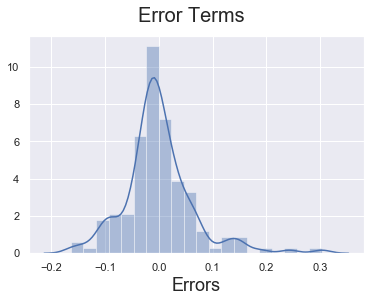

In [109]:
# Residual Analysis of the train data
# One of major assumptions of linear regression is that error terms should be normally distributed,
# verifying by observing the histogram plot of the error terms.
# First, perform predict on the final model and get the predicted y_train values
# Next, plot the histogram of the error terms
y_train_values = final_model_2.predict()

fig = plt.figure()
sns.distplot((y_train - y_train_values), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

This plot represents a decent linear curve

In [110]:
# Peform scalar transform on the test dataset for the categorical eligible columns
# Those eligible columns were already stored as backup earlier
# Applying the transformation on the test set using the learning of the train set therefore we only transform.
# we only use those variables which we used to train the final model.
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

In [111]:
# Make predictions on the test dataset
# Before making any inference about the equation of the linear regression, let's test it on the test dataset
# First step is to divide the whole test dataset into X_test and y_test
# Next we subset df_test with only final model features and perform mandatory step of adding constant
# Finally, using the final model object call the predict method and get the predicted y_pred values
y_test = df_test.pop('price')
X_test = df_test[X_train_rfe.columns]
X_test = sm.add_constant(X_test)
y_pred = final_model_2.predict(X_test)

Text(0, 0.5, 'y_pred')

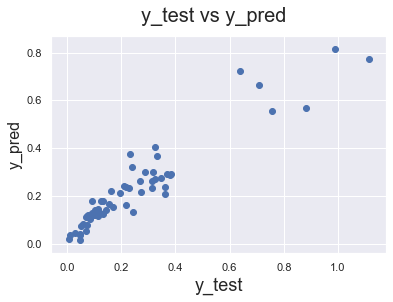

In [112]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [113]:
# Model Evaluation
# We first calculate the model RMSE value, and expected is that it should be lowest possible
# We observe that model RMSE score is 0.095 which is a good metric of the model
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

# We also calculate the r2 score which should be high enough in range of 0 to 1.
# We observe that model r2 score is 0.83 which is a good metric of the model
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.08642042809144246
Model r2_score: 0.8602668468433254


So we have a one more model in place with RMSE and r2 square both of 0.086 and adjusted r2 of 0.90 and p-values are zero for almost all feature variables. Moving on to create one more model fit and then will compare all the built models 

## Step 9: Building & Evaluating Model 3 (Using RFE)
#### In this model we will be not creating any derived variables and instead try to build a baseline model with existing features. And then will test it's performance, this will help to evaluate the basic linear regression model for this dataset

#### Data Preparation

In [114]:
# Merge quantitative and categorical features from backup dataframes
# Join categorical and quantitative frames and build a master dataframe ready to perform modelling
master_df = carprice_quant_df_backup_new.join(carprice_cat_df_backup)
print(master_df.shape)
master_df.head()

(205, 47)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_risky,symboling_safe,carsegment_luxury,carsegment_premium
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,1,0,0,1,0,1,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,1,0,0,1,0,1,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,1,0,0,0,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,1,0,0,1,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,1,0,0,1,0,1,0


In [115]:
# Get columns which have just ONE distinct values in all the rows. This would help to cleanup the master dataframe.
# This uses the custom built utility function get_drop_column_having_one_unique_value()
get_drop_column_having_one_unique_value(master_df, drop=True)

Shape of dataframe (205, 47)
Your selected dataframe has 47 columns.
There are 0 columns that have only ONE distinct value in all the rows.
Shape of dataframe after dropping columns.(205, 47)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_risky,symboling_safe,carsegment_luxury,carsegment_premium
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,1,0,0,1,0,1,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,1,0,0,1,0,1,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,1,0,0,0,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,1,0,0,1,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,1,0,0,0,1,1,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,1,0,0,0,1,1,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,1,0,0,0,1,1,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,1,0,0,0,0,0,1,1,0


In [116]:
# List down all the feature columns in the master frame generated after all data cleaning/preparation/visualisation.
master_df.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype', 'aspiration',
       'doornumber', 'enginelocation', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'symboling_risky', 'symboling_safe', 'carsegment_luxury',
       'carsegment_premium'],
      dtype='object')

#### Train-Test Split

In [117]:
# Splitting the master dataframe into training and testing set.
# The first basic step for regression model building is performing a train-test split.
# Specify this so that the train and test data set always have the same rows using seed, respectively
np.random.seed(0)
df_train, df_test = train_test_split(master_df, train_size = 0.7, test_size = 0.3, random_state = 100)
print('df_train shape:', df_train.shape)
print('df_test shape:', df_test.shape)

df_train shape: (143, 47)
df_test shape: (62, 47)


In [118]:
# MinMax Scaling
# We use the cols_to_scale_backup list of columns stored while doing data preparation for model 1
# Observe that quantitative columns are in different range of values, so we should rescale
# Applying MinMax scaling to all the columns except the binary and dummy variables
scaler = MinMaxScaler()
df_train[cols_to_scale_backup] = scaler.fit_transform(df_train[cols_to_scale_backup])
df_train[cols_to_scale_backup].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131


In [119]:
# Observe statistics describe of training dataframe, scaling has been successfuly performed.
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_risky,symboling_safe,carsegment_luxury,carsegment_premium
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.244755,0.104895,0.412587,0.118881
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.431453,0.307495,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [120]:
# Ready to divide the training dataframe into X and y datasets for the model building
# Got ready X_train and y_train for model building
y_train = df_train.pop('price')
X_train = df_train

#### Model Building

In [121]:
# Creating a LinearRegression model object importing from sklearn.linear_model package & fit it with X_train & y_train
# Next initiate RFE which is the feature ranking technique with recursive feature elimination.
# Running RFE with the desired number of features to select equal to 20
# Once RFE object is ready, fetch the ranks of top features with support and rank information
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

rfe = RFE(lm_model, 20)
rfe = rfe.fit(X_train, y_train)

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['col_name', 'support', 'rank'])
rfe_df[rfe_df['support']].sort_values(by='rank', ascending=False)

,col_name,support,rank
0,wheelbase,True,1
2,carwidth,True,1
34,cylindernumber_two,True,1
33,cylindernumber_twelve,True,1
32,cylindernumber_three,True,1
28,enginetype_rotor,True,1
25,enginetype_ohc,True,1
23,enginetype_dohcv,True,1
20,carbody_wagon,True,1
19,carbody_sedan,True,1


In [122]:
# Analyse the poitive & negative RFE reported support features
print('columns with positive RFE support:')
print(X_train.columns[rfe.support_], '\n')
rfe_cols = X_train.columns[rfe.support_]
print('columns with negative RFE support:')
print(X_train.columns[~rfe.support_])

# Alter X_train frame with only RFE selected variables
X_train_rfe = X_train[rfe_cols]

columns with positive RFE support:
Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'fueltype', 'enginelocation', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'carsegment_premium'],
      dtype='object') 

columns with negative RFE support:
Index(['carlength', 'carheight', 'compressionratio', 'peakrpm', 'citympg',
       'highwaympg', 'aspiration', 'doornumber', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'symboling_risky', 'symboling_safe',
       'carsegment_luxury'],
    

In [123]:
# Fit a linear regression model using RFE referred features in X_train and then print the statsmodel summary
# We observe that curbweight has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop curbweight and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('curbweight', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     120.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.28e-70
Time:                        23:04:24   Log-Likelihood:                 229.98
No. Observations:                 143   AIC:                            -420.0
Df Residuals:                     123   BIC:                            -360.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [124]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that all features now having p-value less than 0.05, so it's making all variables significant.
# Next, let's check the VIF scores and ranks to proceed further and find collinearity among these variables
fit_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     125.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.32e-70
Time:                        23:04:24   Log-Likelihood:                 228.51
No. Observations:                 143   AIC:                            -419.0
Df Residuals:                     124   BIC:                            -362.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

              Features    VIF
14    enginetype_rotor    inf
17  cylindernumber_two    inf
7       enginelocation  75.09
2           enginesize  53.42
1             carwidth  47.52
4               stroke  36.09
0            wheelbase  24.51
5           horsepower  21.15
10       carbody_sedan  20.56
6             fueltype  17.83


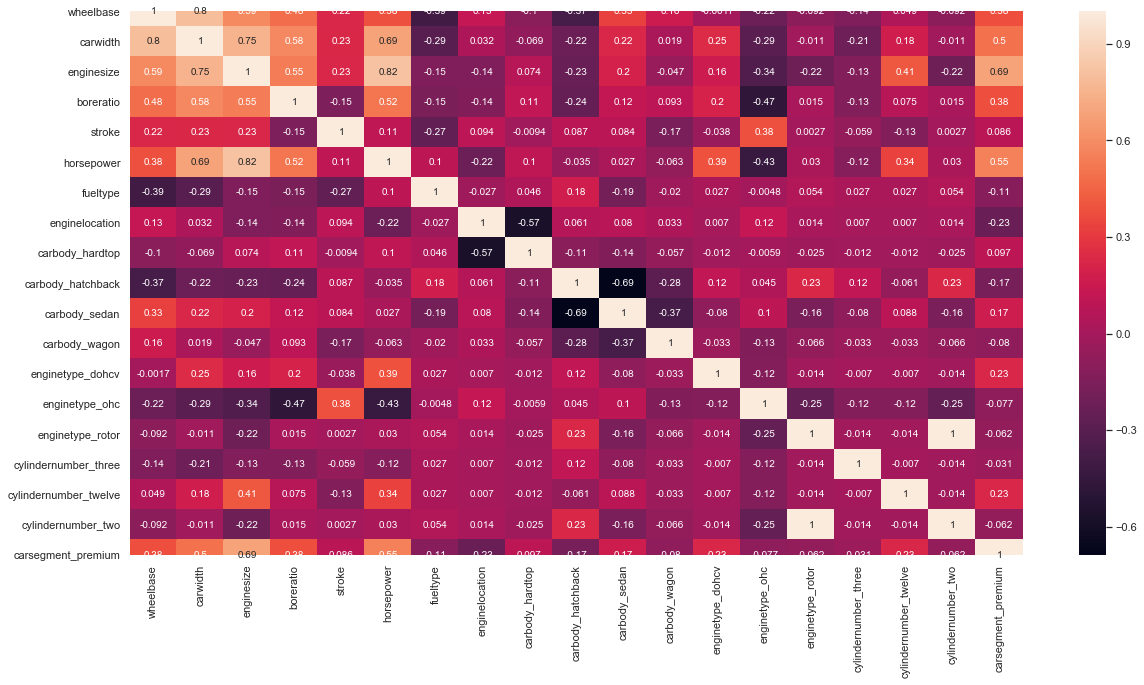

In [125]:
# let's check the VIF scores and ranks and find out any visible collinearity among these variables
# By checking VIF score, we find that cylindernumber_two and enginetype_rotor have "inf" VIF value.
# inf value as VIF denotes that these two variables are having strong correlation with the target variable i.e 1
# We also observe in the below heatmap that cylindernumber_two and enginetype_rotor have a correlation of 1
# Let's drop both cylindernumber_two and enginetype_rotor, then retry fitting a new model
get_vif(X_train_rfe)
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe.corr(),annot = True)
X_train_rfe = X_train_rfe.drop(['cylindernumber_two', 'enginetype_rotor'], axis=1)

In [126]:
# Fit a linear regression model using RFE referred features in X_train and then print the statsmodel summary
# We observe that enginesize has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop enginesize and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('enginesize', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     112.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.25e-67
Time:                        23:04:25   Log-Likelihood:                 216.67
No. Observations:                 143   AIC:                            -397.3
Df Residuals:                     125   BIC:                            -344.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [127]:
# Fit a linear regression model using RFE referred features in X_train and then print the statsmodel summary
# We observe that enginetype_ohc has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop enginetype_ohc and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('enginetype_ohc', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     120.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.03e-68
Time:                        23:04:26   Log-Likelihood:                 216.30
No. Observations:                 143   AIC:                            -398.6
Df Residuals:                     126   BIC:                            -348.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [128]:
# Fit a linear regression model using RFE referred features in X_train and then print the statsmodel summary
# We observe that stroke has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop stroke and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('stroke', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     126.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.25e-68
Time:                        23:04:26   Log-Likelihood:                 214.85
No. Observations:                 143   AIC:                            -397.7
Df Residuals:                     127   BIC:                            -350.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [129]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that cylindernumber_twelve has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop cylindernumber_twelve and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('cylindernumber_twelve', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     134.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.70e-69
Time:                        23:04:26   Log-Likelihood:                 213.78
No. Observations:                 143   AIC:                            -397.6
Df Residuals:                     128   BIC:                            -353.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

In [130]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that boreratio has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop boreratio and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('boreratio', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     143.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.87e-70
Time:                        23:04:26   Log-Likelihood:                 212.51
No. Observations:                 143   AIC:                            -397.0
Df Residuals:                     129   BIC:                            -355.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2940 

In [131]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that all features now having p-value less than 0.05, so it's making all variables significant.
# Next, let's check the VIF scores and ranks to proceed further and find collinearity among these variables
fit_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     152.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.34e-70
Time:                        23:04:26   Log-Likelihood:                 210.88
No. Observations:                 143   AIC:                            -395.8
Df Residuals:                     130   BIC:                            -357.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2658 

In [132]:
# Using get_vif to get VIF ranking for all variables in descending order using variance_inflation_factor method
# Prints the vif_df containing VIF ranks for each variable/feature
# We observe that enginelocation has very slightly high VIF value i.e 10.32%, this leads to slight multicollinearity.
# Following on rule that any VIF scroe above 10 should be handled and dealt with by dropping it and observe impact
# So, dropping enginelocation feature
get_vif(X_train_rfe)
X_train_rfe = X_train_rfe.drop('enginelocation', axis=1)

              Features    VIF
4       enginelocation  55.58
1             carwidth  43.65
0            wheelbase  21.97
7        carbody_sedan  17.50
3             fueltype  15.59
6    carbody_hatchback  12.10
2           horsepower   9.64
8        carbody_wagon   5.87
11  carsegment_premium   1.83
5      carbody_hardtop   1.38


In [133]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that carbody_hardtop has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop carbody_hardtop and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('carbody_hardtop', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     159.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.37e-70
Time:                        23:04:26   Log-Likelihood:                 207.64
No. Observations:                 143   AIC:                            -391.3
Df Residuals:                     131   BIC:                            -355.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0809 

In [134]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that all features now having p-value less than 0.05, so it's making all variables significant.
# Next, let's check the VIF scores and ranks to proceed further and find collinearity among these variables
fit_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     172.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.15e-70
Time:                        23:04:26   Log-Likelihood:                 205.97
No. Observations:                 143   AIC:                            -389.9
Df Residuals:                     132   BIC:                            -357.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0417 

In [135]:
# Using get_vif to get VIF ranking for all variables in descending order using variance_inflation_factor method
# Prints the vif_df containing VIF ranks for each variable/feature
# We observe that carwidth has very slightly high VIF value i.e 10.32%, this leads to slight multicollinearity.
# Following on rule that any VIF scroe above 10 should be handled and dealt with by dropping it and observe impact
# So, dropping carwidth feature
get_vif(X_train_rfe)
X_train_rfe = X_train_rfe.drop('carwidth', axis=1)

               Features    VIF
1              carwidth  35.41
0             wheelbase  21.66
3              fueltype   9.26
5         carbody_sedan   8.80
2            horsepower   8.66
4     carbody_hatchback   5.79
6         carbody_wagon   3.46
9    carsegment_premium   1.82
7      enginetype_dohcv   1.31
8  cylindernumber_three   1.07


In [136]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that cylindernumber_three has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop cylindernumber_three and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('cylindernumber_three', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     167.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.08e-68
Time:                        23:04:26   Log-Likelihood:                 196.75
No. Observations:                 143   AIC:                            -373.5
Df Residuals:                     133   BIC:                            -343.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1027 

In [137]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that enginetype_dohcv has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop enginetype_dohcv and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('enginetype_dohcv', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     188.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.05e-69
Time:                        23:04:26   Log-Likelihood:                 195.95
No. Observations:                 143   AIC:                            -373.9
Df Residuals:                     134   BIC:                            -347.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1046      0

In [138]:
# Tried again to fit a LR model using remaining RFE referred features in X_train and then print the statsmodel summary
# We observe that fueltype has a p-value greater than 0.05, so it's making this variable insignificant.
# Let's drop fueltype and try to fit the model again with remaining features
fit_model(X_train_rfe)
X_train_rfe = X_train_rfe.drop('fueltype', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     199.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.22e-68
Time:                        23:04:26   Log-Likelihood:                 190.58
No. Observations:                 143   AIC:                            -365.2
Df Residuals:                     135   BIC:                            -341.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1096      0

#### Model 3 is ready

In [139]:
# So now we have got our 2nd model, we observe that all the features p-value is almost zero,
# making all the features significant.
final_model_3 = fit_model(X_train_rfe, return_flag=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.25e-67
Time:                        23:04:26   Log-Likelihood:                 185.62
No. Observations:                 143   AIC:                            -357.2
Df Residuals:                     136   BIC:                            -336.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0418      0

In [140]:
# Also verifying the VIF values, so now all the feature variables are below threshold of 10, it's a good model
get_vif(X_train_rfe)

             Features   VIF
0           wheelbase  8.32
3       carbody_sedan  4.35
1          horsepower  4.28
2   carbody_hatchback  2.29
4       carbody_wagon  2.08
5  carsegment_premium  1.78


#### Model Evaluation

Text(0.5, 0, 'Errors')

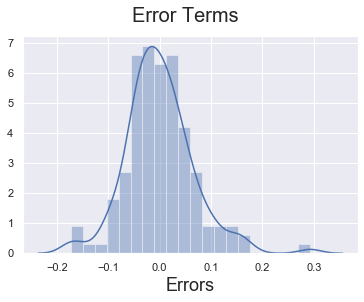

In [141]:
# Residual Analysis of the train data
# One of major assumptions of linear regression is that error terms should be normally distributed,
# verifying by observing the histogram plot of the error terms.
# First, perform predict on the final model and get the predicted y_train values
# Next, plot the histogram of the error terms
y_train_values = final_model_3.predict()

fig = plt.figure()
sns.distplot((y_train - y_train_values), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

This plot represents a decent linear curve

In [142]:
# Peform scalar transform on the test dataset for the categorical eligible columns
# Those eligible columns were already stored as backup earlier
# Applying the transformation on the test set using the learning of the train set therefore we only transform.
# we only use those variables which we used to train the final model.
df_test[cols_to_scale_backup] = scaler.transform(df_test[cols_to_scale_backup])

In [143]:
# Make predictions on the test dataset
# Before making any inference about the equation of the linear regression, let's test it on the test dataset
# First step is to divide the whole test dataset into X_test and y_test
# Next we subset df_test with only final model features and perform mandatory step of adding constant
# Finally, using the final model object call the predict method and get the predicted y_pred values
y_test = df_test.pop('price')
X_test = df_test[X_train_rfe.columns]
X_test = sm.add_constant(X_test)
y_pred = final_model_3.predict(X_test)

Text(0, 0.5, 'y_pred')

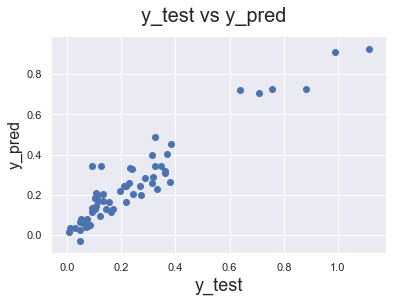

In [144]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [145]:
# Model Evaluation
# We first calculate the model RMSE value, and expected is that it should be lowest possible
# We observe that model RMSE score is 0.095 which is a good metric of the model
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

# We also calculate the r2 score which should be high enough in range of 0 to 1.
# We observe that model r2 score is 0.83 which is a good metric of the model
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.07466798478561981
Model r2_score: 0.8956877067378122


## Step 10: Overall Evaluation & Inference

- Overall we got three models and all of them seem to be mostly similar and the error terms are also decent linear relational plot.
- All the models have r2_score on the test data very close to the trained Adjusted R-Squared value of the models.
- Also we have a significantly high r2_score and a low RMSE.
- The error distrubution also is more closer to a normal distribution and centered at/around zero.

| Model No. | Adj.R-Squared | r2_score | Prob (F-statistic) | AIC | BIC | RMSE
| --- | --- | --- | --- | --- | --- | --- |
Model 1 | 0.883 | 0.847 | 4.65e-63 | -333.9 | -316.1 | 0.090
Model 2 | 0.903 | 0.860 | 1.34e-69 | -361.2 | -346.3 | 0.086
Model 3 | 0.901 | 0.895 | 4.25e-67 | -357.2 | -336.5 | 0.074

- Model 1 gives a decent performance, but result shows adjusted R squared of 0.883, r2 score of 0.847 and Prob (F-statistic) as 4.65e-63.
- Model 2 gives a slightly better performance and result shows adjusted R squared of 0.903, r2 score of 0.860 and Prob (F-statistic) as 1.34e-69, but seems to be compromising in the overall model fit parameters.
- Model 3 gives the best performance and result shows adjusted R squared of 0.901, r2 score of 0.895 and Prob (F-statistic) as 4.25e-67. Therefore considering the overall fit of the model and by comparing results for train and test dataset, would propose **selecting Model 3 with highest r2_score, lowest RMSE, and zero p-value / Prob (F.statistic).**

Final inference from model evaluation is that with a low p-value, low prob (F.statistic), low VIF and these variables do describe the price of the automobiles to a good extent. Final predictors which can be proposed are:

| Predictor | Coef | p-value |
| --- | --- | --- |
| wheelbase | 0.3328 | 0.000 |
| horsepower | 0.5791 | 0.000 |
| carbody_hatchback | -0.1372 | 0.000 |
| carbody_sedan | -0.1183 | 0.000 |
| carbody_wagon | -0.1459 | 0.000 |
| carsegment_premium | 0.2664 | 0.000 |

We can see that the equation of our best fitted line is:

**$ price = 0.0418 + 0.3328  \times  wheelbase + 0.5791 \times horsepower - 0.1372 \times carbody\_hatchback - 0.1183 \times carbody\_sedan - 0.1459 \times carbody\_wagon + 0.2664 \times carsegment\_premium $**

This equation implies how the price of the vehicle changes with a unit change in any of these independent variable with all other variables held constant.
- For example we can say, the price of the car changes by 0.3328 for every unit change in the wheelbase dimension if all other variables are held constant. And so is true for all other variables.
- The price of the car changes by 0.5791 for every unit change in the horsepower value if all other variables are held constant.
- The predictor carbody_hatchback, carbody_sedan and carbody_wagon suggests that the price of car decreases by a factor of 0.1785, 0.1183, 0.1459 respectively, when the car body is hatchback, sedan and wagon.
- The car segment is also essensial in determining the price the automobile. High segment cars like premium further adds up to the price by a factor of 0.2664.

Overall a decent model, but may be could even do better by trying more permutation among the feature combinations and testing out on the entire dataset

| Adj. R-squared | r2_score | Prob (F-statistic) | AIC | BIC | RMSE
| --- | --- | --- | --- | --- | --- |
| 0.901 | 0.895 | 4.25e-67 | -357.2 | -336.5 | 0.074

**Suggestions:**
The chinese company  Geely Automotives entering the US market should consider the below listed points,
-  **Average US car price:**  13000 USD (approx).
For profitability and effective pricing of cars in this new market, the model's price predictors variables have to be regulated and balanced effectively to meet certain price levels and gain an edge over the other competitors.

Also, keeping into account the predominating or the popular factors of a car in the US market will give a better understanding of the needs and requirment of the citizens of USA.
- `moderate` symboling is the most frequest
- fuel type is mostly `gas`
- aspiration is `standard` mostly
- number of doors as `four` is widely famous
- `sedan` car body is sold most
- drivewheel as `forward` is the most widely used
- preferred enginelocation is mostly `front`
- enginetype preferred is mostly `ohc`
- `four` cylinders in number is mostly preferred
- `mpfi` is the most widely used fuel system

This can be used to make the appropriate changes in design, features and the price offered to the customer.